# Part 1

# Initial Review

In [583]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read data frame from csv file
df = pd.read_csv('covid19-cdc-combined-22207000-12468998.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)

# read size from csv
df.shape

(40000, 19)

In [584]:
df.duplicated().sum()

3704

In [585]:
# Assign different features their respective feature type: continuous; categorical.
continuous_features = df.select_dtypes(['int64', 'float64']).columns.delete([0, 1])
categorical_features = df.select_dtypes(['object']).columns.tolist()

## Decisions Taken After Initial Dataset Review

1. We should drop the features that duplicate data captured elsewhere, namely the 2 FIPS code features
2. As we are unable to uniquely identify the tuples in the dataset against a unique patient or instance of contracting covid, we cannot remove duplicates found as we cannot say with certainty that these duplicate hits are genuinely noise drowning out signal.

In [586]:
# Here we drop the columns we have identified as redundant
df.drop(df.columns[[2, 4]], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case_month                       40000 non-null  object 
 1   res_state                        40000 non-null  object 
 2   res_county                       37583 non-null  object 
 3   age_group                        39716 non-null  object 
 4   sex                              39184 non-null  object 
 5   race                             35362 non-null  object 
 6   ethnicity                        34960 non-null  object 
 7   case_positive_specimen_interval  21102 non-null  float64
 8   case_onset_interval              17292 non-null  float64
 9   process                          40000 non-null  object 
 10  exposure_yn                      40000 non-null  object 
 11  current_status                   40000 non-null  object 
 12  symptom_status    

In [587]:
# As per instruction we are going to save this initially reviewed dataset set as a new file so that we can begin to operate on the dataset
df.to_csv('revised-covid19-cdc-combined-22207000-12468998.csv', index=False)

# Data Quality Report

In [588]:
df = pd.read_csv('revised-covid19-cdc-combined-22207000-12468998.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)

# Assign different features their respective feature type: continuous; categorical.
continuous_features = df.select_dtypes(['int64', 'float64']).columns
categorical_features = df.select_dtypes(['object']).columns
df.shape

(40000, 17)

## Continuous Features

In [589]:
# Print descriptive table for continous features in dataset.
df[continuous_features].describe().T

,count,mean,std,min,25%,50%,75%,max
case_positive_specimen_interval,21102.0,0.168088,2.390216,-72.0,0.0,0.0,0.0,79.0
case_onset_interval,17292.0,-0.026255,1.937639,-55.0,0.0,0.0,0.0,58.0


In [590]:
df[continuous_features].describe()

,case_positive_specimen_interval,case_onset_interval
count,21102.000000,17292.000000
mean,0.168088,-0.026255
std,2.390216,1.937639
min,-72.000000,-55.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,79.000000,58.000000


In [591]:
# Lets calculate how many values are below 0 - upon review negative values are possible this feature.

df['case_positive_specimen_interval'].apply(lambda x: (x<0)).sum()

124

In [592]:
# Similarly, we know that the values here should be at the minimum 0 weeks, and cannot be a negative value.
# Lets calculate how many values are below 0.
df['case_onset_interval'].apply(lambda x: (x<0)).sum()

557

In [593]:
# Find out the percentage of missing data from our continuous features
continous_features_missing  = 100 * (df[continuous_features].isnull().sum()/df.shape[0])
continous_features_missing = pd.DataFrame(continous_features_missing, columns=['%missing'])
continous_features_missing

,%missing
case_positive_specimen_interval,47.245
case_onset_interval,56.770


In [594]:
# Create cardinality column and to add it to our summary table
continous_features_cardinality = df[continuous_features].nunique()
continous_features_cardinality = pd.DataFrame(continous_features_cardinality, columns=['cardinality'])
continous_features_cardinality

,cardinality
case_positive_specimen_interval,76
case_onset_interval,59


In [595]:
# Add missing values column
default_continuous_features_info = df[continuous_features].describe().T
df_table_continuous = pd.concat([default_continuous_features_info, continous_features_missing, continous_features_cardinality], axis=1)
df_table_continuous

,count,mean,std,min,25%,50%,75%,max,%missing,cardinality
case_positive_specimen_interval,21102.0,0.168088,2.390216,-72.0,0.0,0.0,0.0,79.0,47.245,76
case_onset_interval,17292.0,-0.026255,1.937639,-55.0,0.0,0.0,0.0,58.0,56.770,59


## Categorical Features

In [596]:
# Here we are looking to assign the type category to any column in our dataset that has the value of object.

for column in categorical_features:
    df[column] = df[column].astype('category')

categorical_features

Index(['case_month', 'res_state', 'res_county', 'age_group', 'sex', 'race',
       'ethnicity', 'process', 'exposure_yn', 'current_status',
       'symptom_status', 'hosp_yn', 'icu_yn', 'death_yn',
       'underlying_conditions_yn'],
      dtype='object')

In [597]:
# Given the high level of cardinality of some of our data types we should investigate what the values contained within are dataset
for c in categorical_features:
    print(df[c].unique())
    print()

['2022-01', '2020-11', '2020-03', '2020-12', '2021-02', ..., '2022-10', '2022-04', '2021-06', '2022-03', '2022-11']
Length: 35
Categories (35, object): ['2020-01', '2020-02', '2020-03', '2020-04', ..., '2022-08', '2022-09', '2022-10', '2022-11']

['MO', 'TN', 'NY', 'VA', 'CA', ..., 'DC', 'OR', 'AK', 'VI', 'VT']
Length: 48
Categories (48, object): ['AK', 'AL', 'AR', 'AZ', ..., 'VT', 'WA', 'WI', 'WY']

[NaN, 'KNOX', 'QUEENS', 'LOS ANGELES', 'CLARK', ..., 'SANTA FE', 'ANGELINA', 'KERR', 'KING GEORGE', 'LEVY']
Length: 932
Categories (931, object): ['ABBEVILLE', 'ACADIA', 'ACCOMACK', 'ADA', ..., 'YELL', 'YELLOWSTONE', 'YORK', 'YUMA']

['65+ years', '50 to 64 years', '18 to 49 years', NaN, 'Missing', '0 - 17 years']
Categories (5, object): ['0 - 17 years', '18 to 49 years', '50 to 64 years', '65+ years', 'Missing']

['Female', 'Male', NaN, 'Unknown', 'Missing']
Categories (4, object): ['Female', 'Male', 'Missing', 'Unknown']

['White', 'Black', 'American Indian/Alaska Native', NaN, 'Unknown'

In [598]:
# Find out the percentage of missing data from our categorical features
categorical_features_na  = (df[categorical_features].isnull().sum())
categorical_features_na = pd.DataFrame(categorical_features_na, columns=['Blank'])
categorical_features_na

,Blank
case_month,0
res_state,0
res_county,2417
age_group,284
sex,816
race,4638
ethnicity,5040
process,0
exposure_yn,0
current_status,0


In [599]:
categorical_features_unknown = (df[categorical_features] == 'Unknown').sum()
categorical_features_unknown = pd.DataFrame(categorical_features_unknown, columns=['Unknown'])
categorical_features_unknown

,Unknown
case_month,0
res_state,0
res_county,0
age_group,0
sex,159
race,3434
ethnicity,5334
process,113
exposure_yn,1586
current_status,0


In [600]:
categorical_features_missing = (df[categorical_features] == 'Missing').sum()
categorical_features_missing = pd.DataFrame(categorical_features_missing, columns=['Missing'])
categorical_features_missing

,Missing
case_month,0
res_state,0
res_county,0
age_group,53
sex,34
race,1556
ethnicity,2093
process,36438
exposure_yn,34483
current_status,0


In [601]:
default_categorical_features_info = df[categorical_features].describe().T
df_table_categorical = pd.concat([default_categorical_features_info, categorical_features_na, categorical_features_unknown, categorical_features_missing], axis=1)
df_table_categorical

,count,unique,top,freq,Blank,Unknown,Missing
case_month,40000,35,2022-01,5367,0,0,0
res_state,40000,48,NY,4345,0,0,0
res_county,37583,931,MIAMI-DADE,817,2417,0,0
age_group,39716,5,18 to 49 years,15548,284,0,53
sex,39184,4,Female,20167,816,159,34
race,35362,8,White,24680,4638,3434,1556
ethnicity,34960,4,Non-Hispanic/Latino,24047,5040,5334,2093
process,40000,11,Missing,36438,0,113,36438
exposure_yn,40000,3,Missing,34483,0,1586,34483
current_status,40000,2,Laboratory-confirmed case,34142,0,0,0


# Data Quality Report: Visualisations

### Continuous Features

array([[<AxesSubplot: title={'center': 'case_positive_specimen_interval'}>,
        <AxesSubplot: title={'center': 'case_onset_interval'}>]],
      dtype=object)

<Figure size 640x480 with 0 Axes>

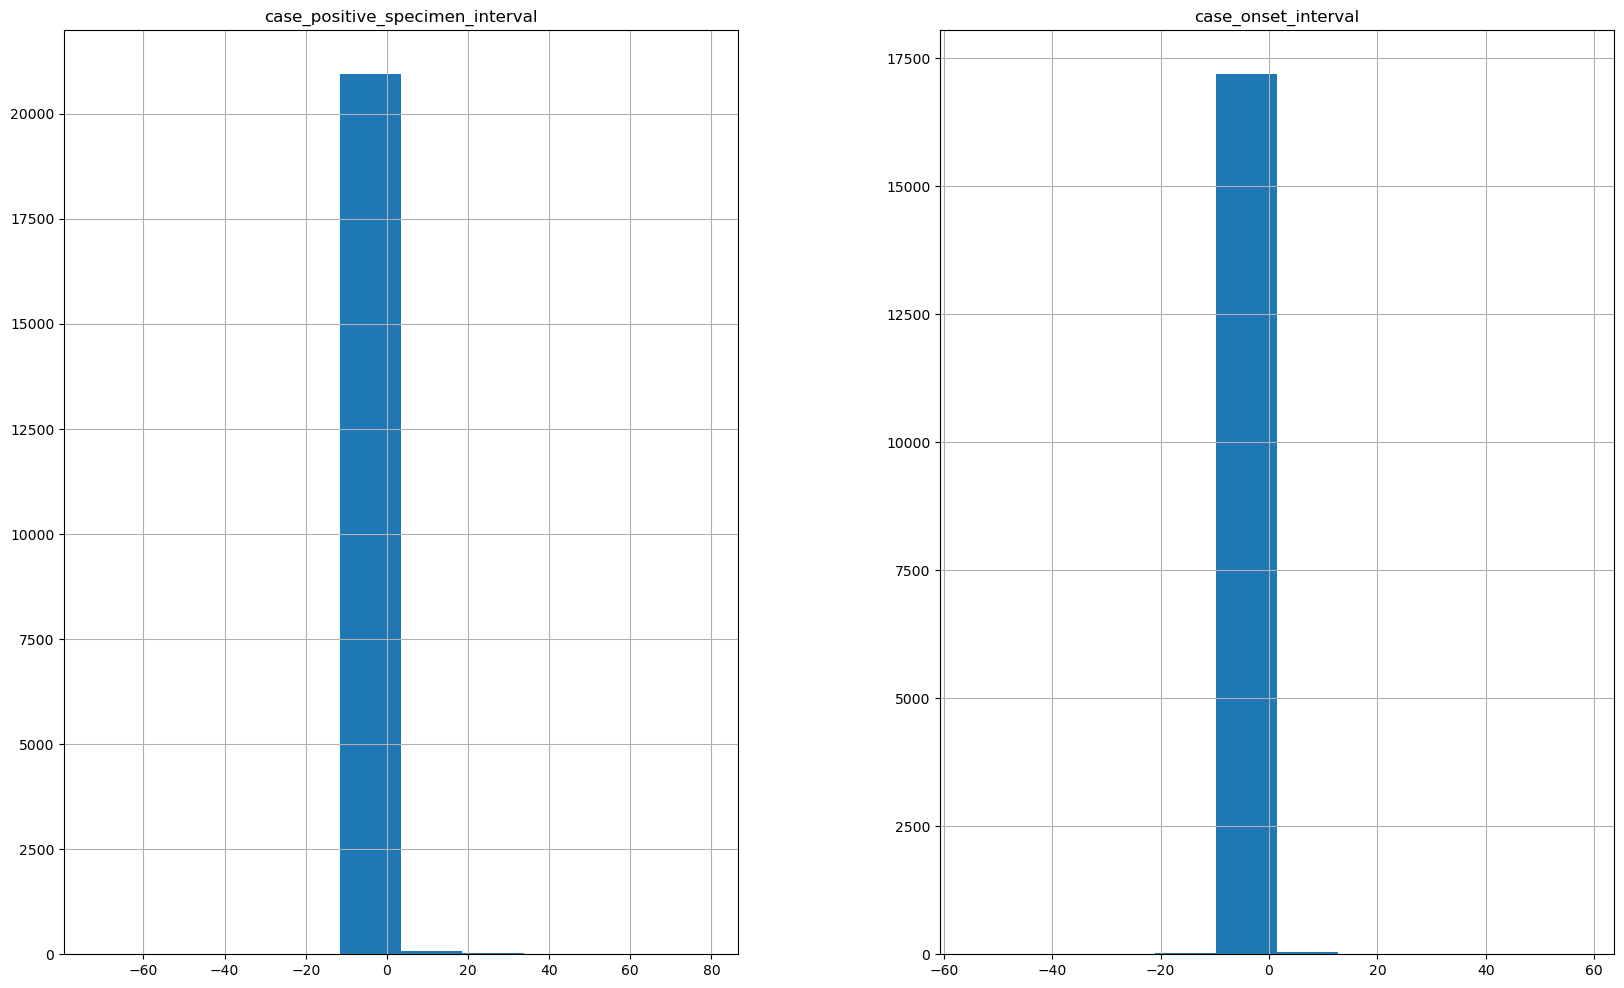

In [602]:
# We can plot the histogram of all numeric features at the same time.
plt.figure()
df.hist(figsize=(20, 12))

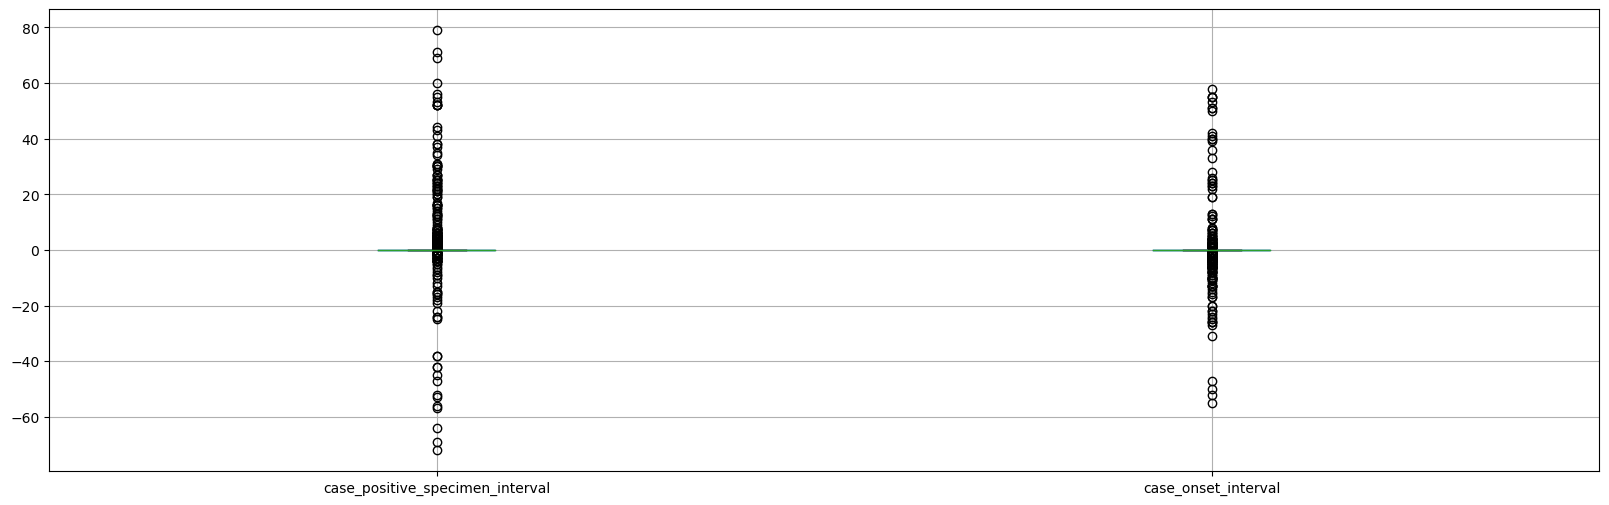

In [603]:
# We can plot the boxplots of all numeric features at the same time.
fig, axs = plt.subplots(figsize=(20, 6), ncols=1, nrows=1)
df.boxplot(ax=axs)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()


<AxesSubplot: >

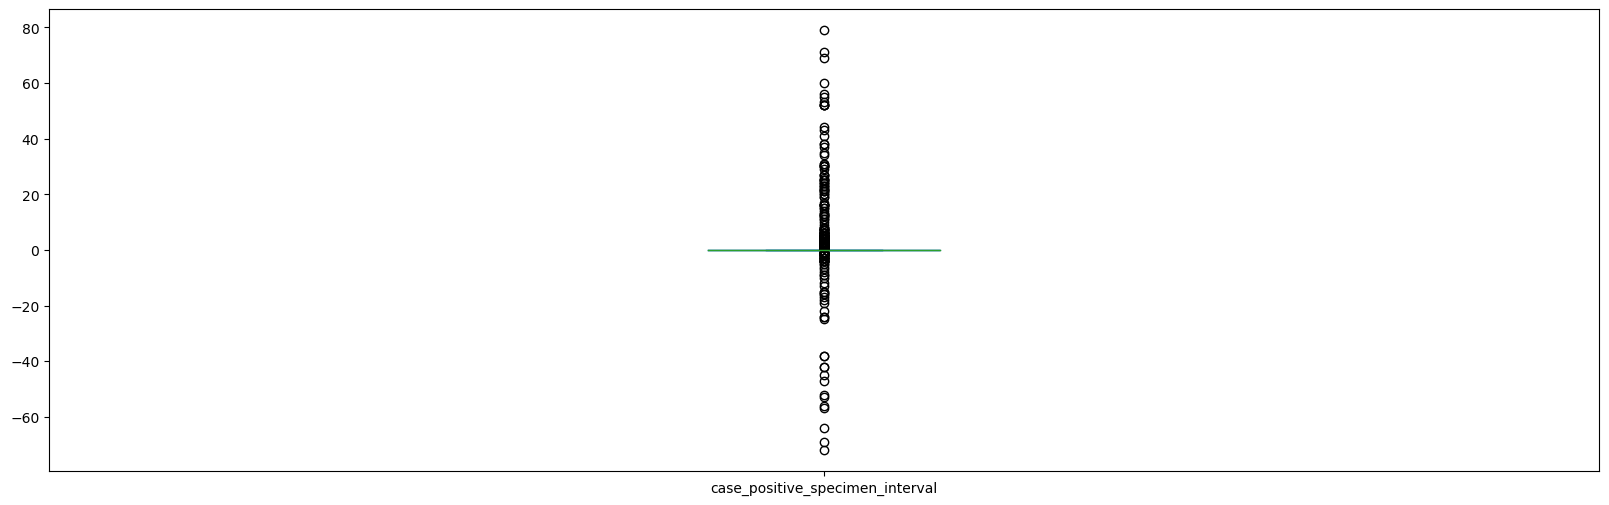

In [604]:
df['case_positive_specimen_interval'].plot.box(figsize=(20,6))

<AxesSubplot: >

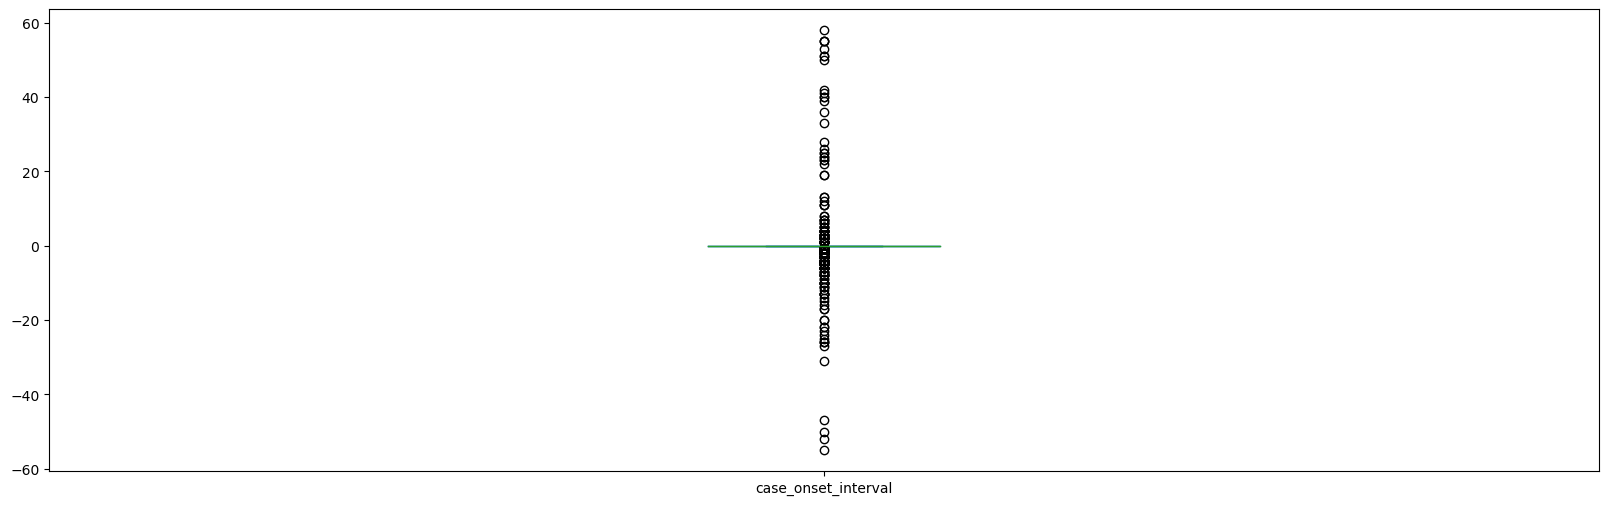

In [605]:
df['case_onset_interval'].plot.box(figsize=(20,6))

<AxesSubplot: title={'center': 'Case onset intervals'}>

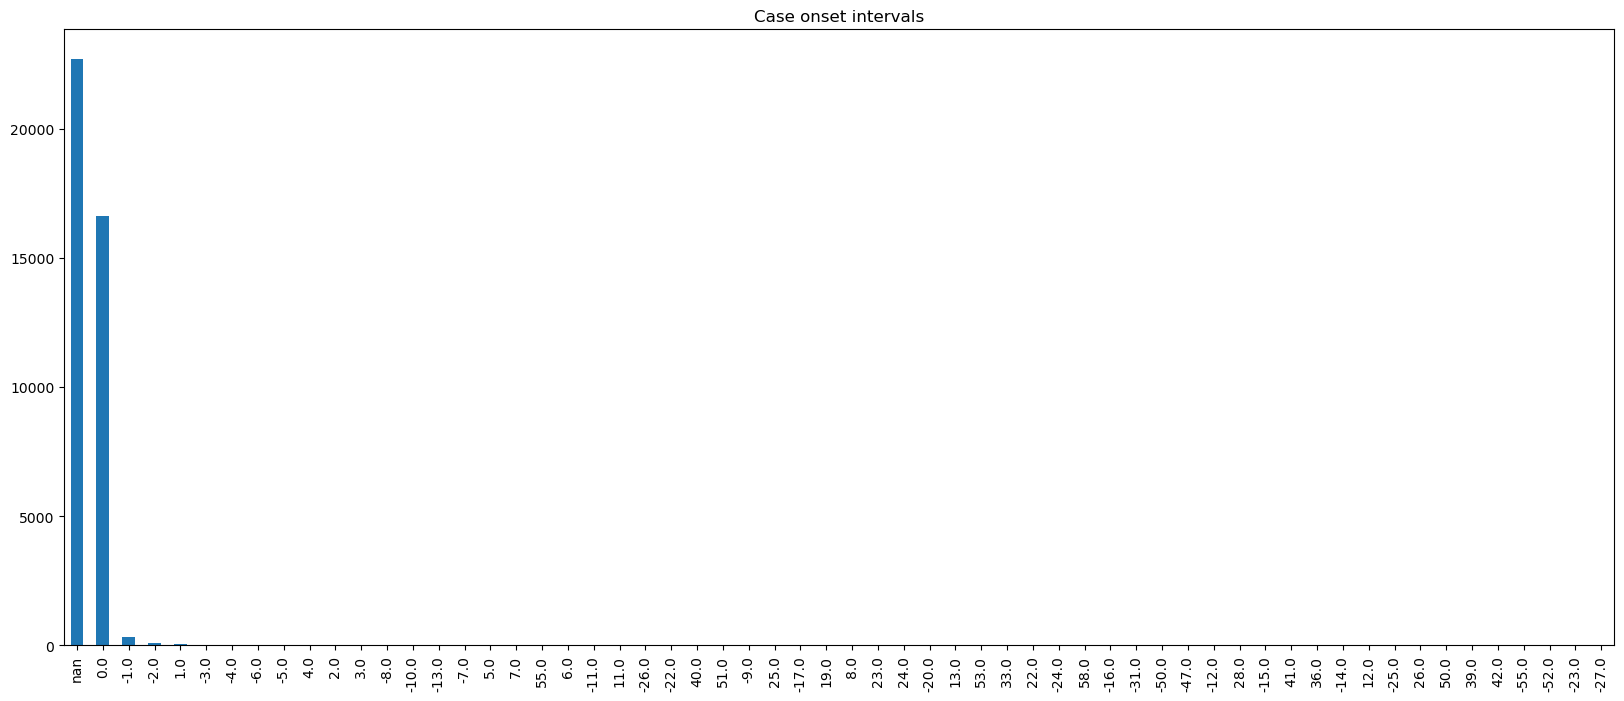

In [606]:
df['case_onset_interval'].value_counts(dropna = False).plot(figsize=(20,8), kind='bar', title='Case onset intervals')

### Categorical Features

<AxesSubplot: title={'center': 'Case Month'}>

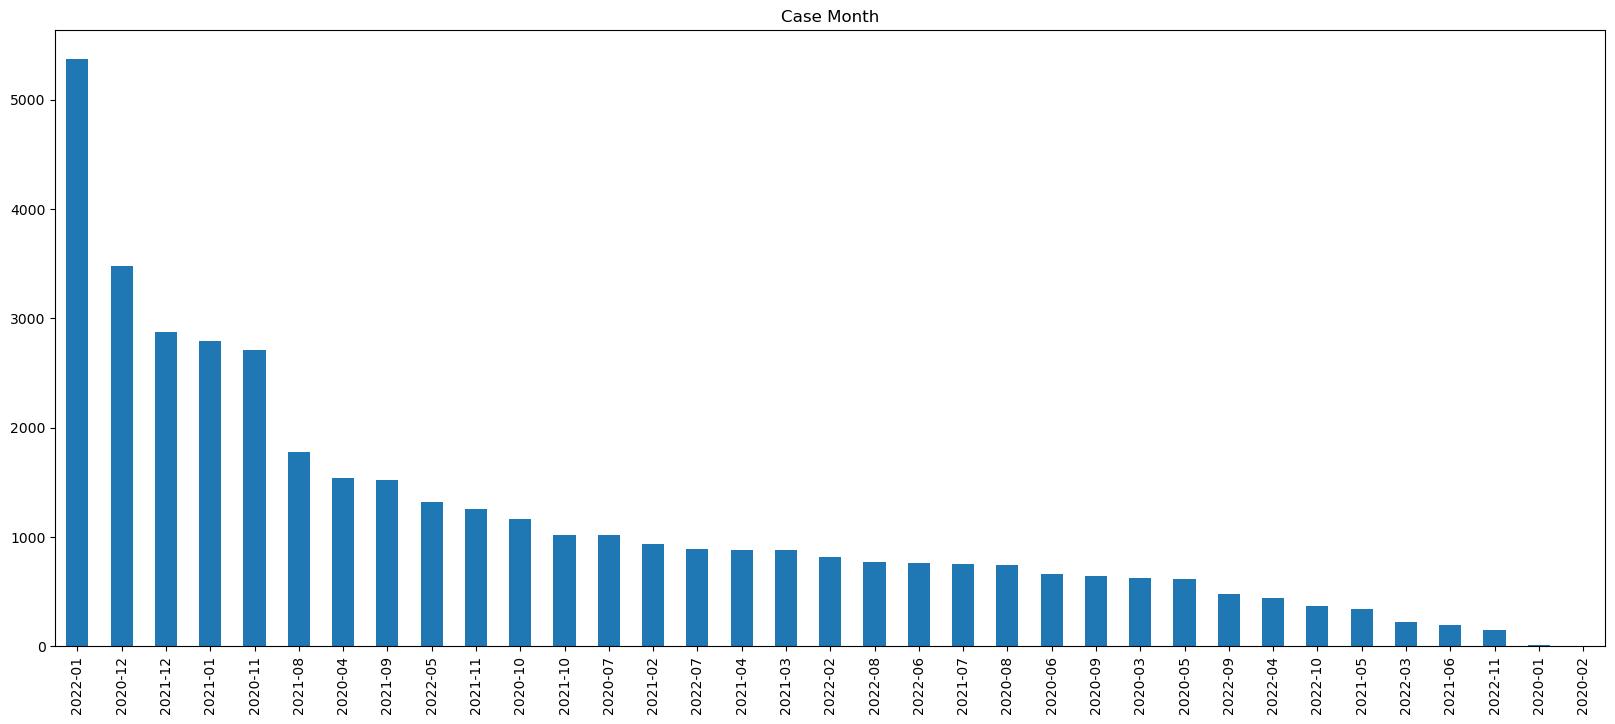

In [607]:
df['case_month'].value_counts(dropna = False).plot(figsize=(20,8), kind='bar', title='Case Month')

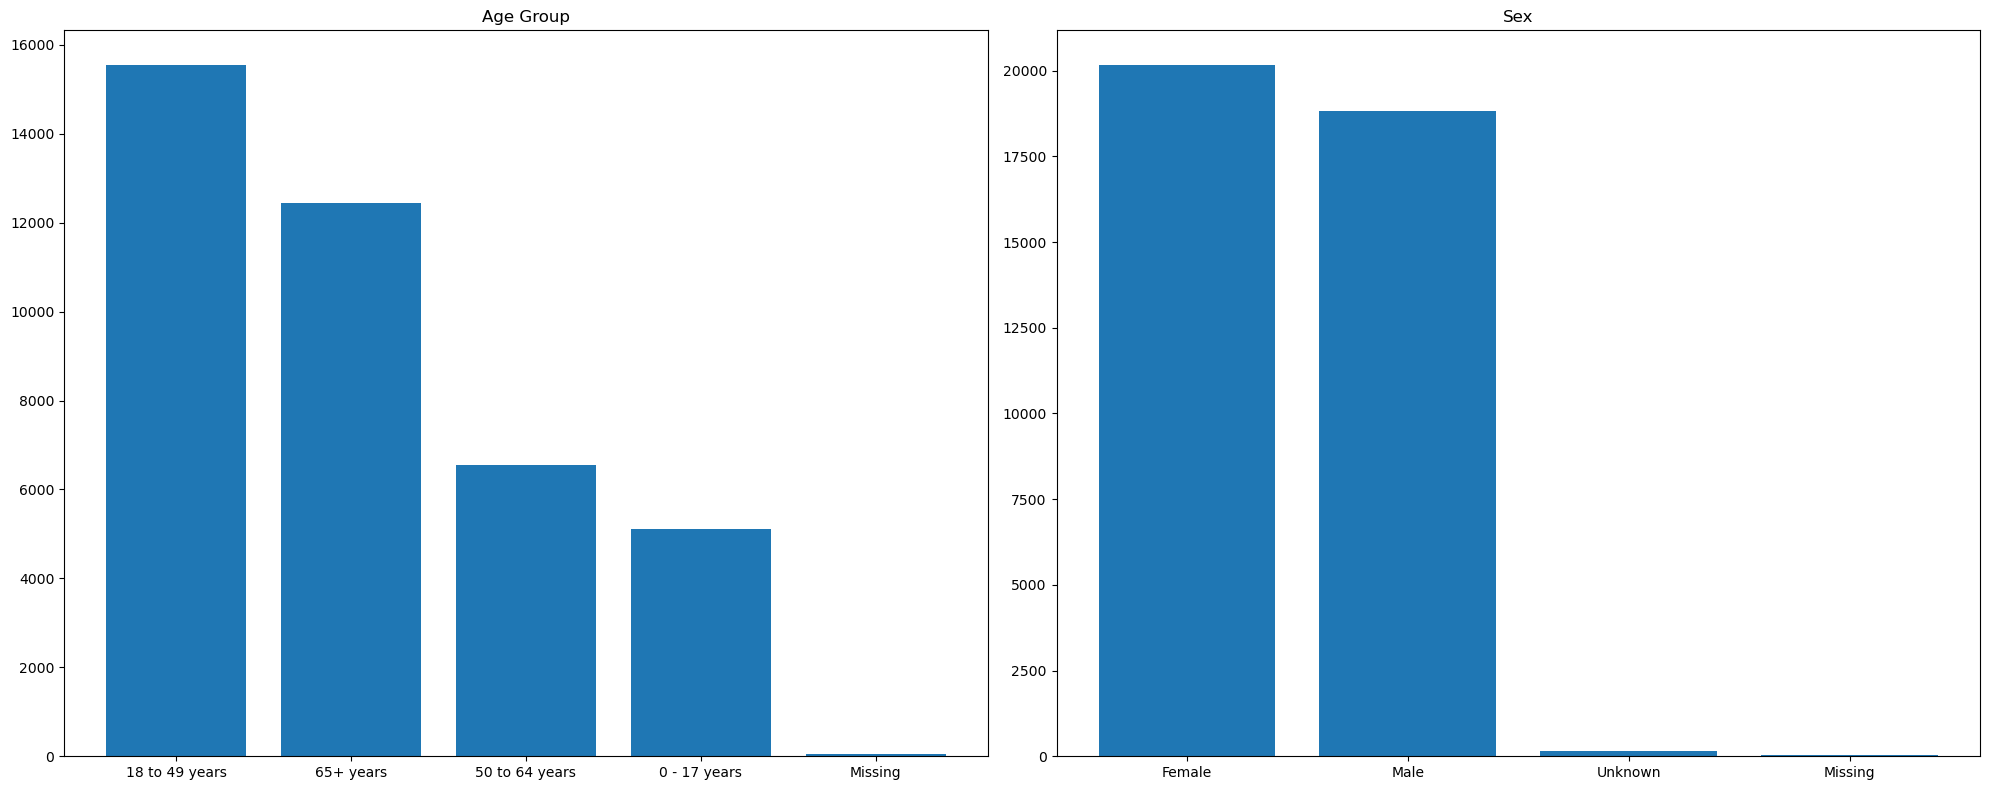

In [608]:
# # Create a figure with two subplots
fig, ((ax1, ax2)) = plt.subplots(ncols=2, nrows=1, figsize=(20, 8))

# Plot the first bar chart on the first subplot
x1 = df['age_group'].value_counts().index
y1 = df['age_group'].value_counts()

x2 = df['sex'].value_counts().index
y2 = df['sex'].value_counts()

ax1.set_title('Age Group')
ax2.set_title('Sex')

ax1.bar(x1, y1)
ax2.bar(x2, y2)

plt.tight_layout()

plt.show()

<AxesSubplot: title={'center': 'Age of COVID Patients'}>

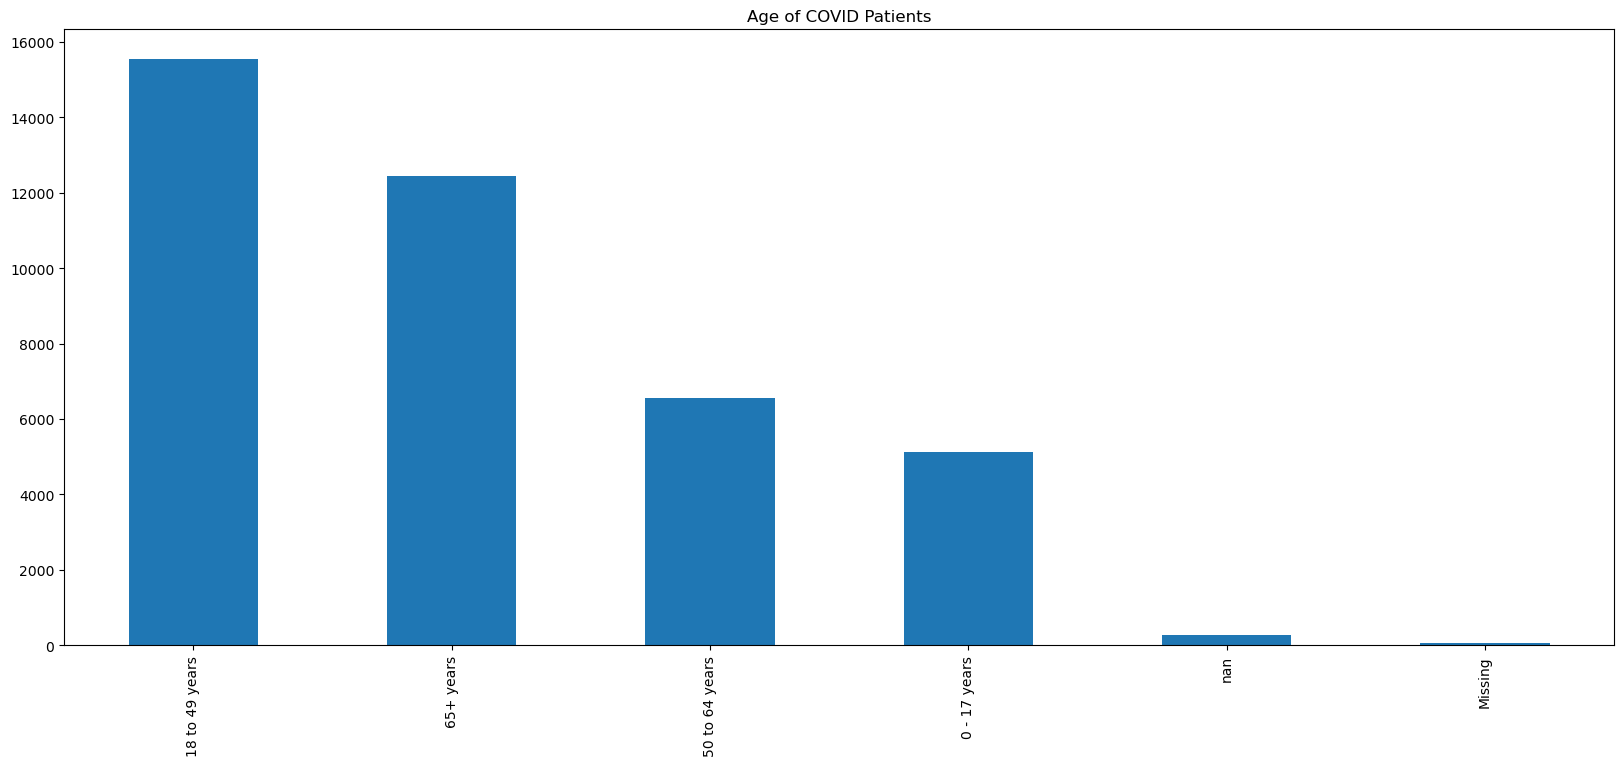

In [609]:
df['age_group'].value_counts(dropna = False).plot(figsize=(20,8), kind='bar', title='Age of COVID Patients')

<AxesSubplot: title={'center': 'Sex of COVID Patients'}>

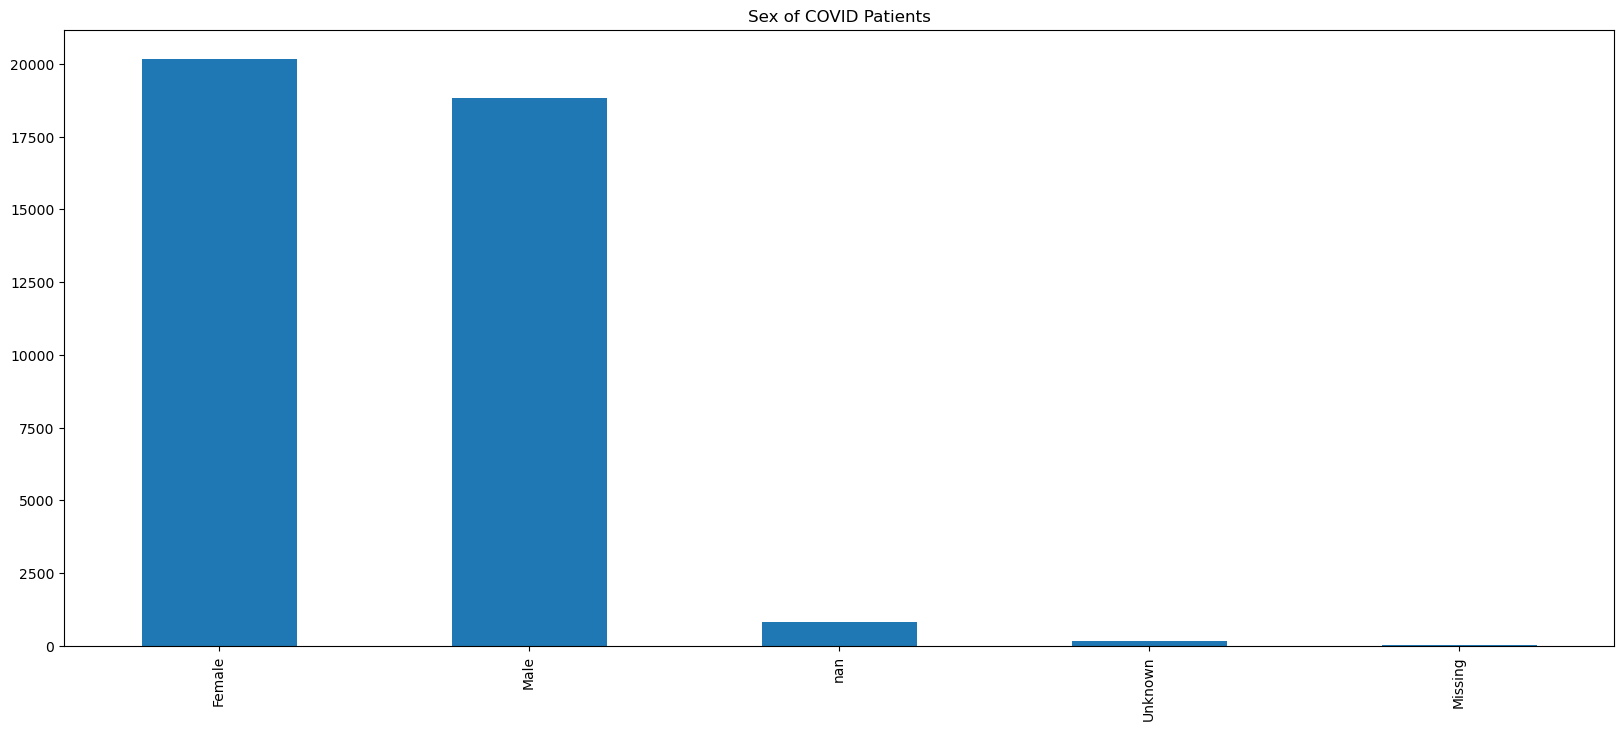

In [610]:
df['sex'].value_counts(dropna = False).plot(figsize=(20,8), kind='bar', title='Sex of COVID Patients')

<AxesSubplot: title={'center': 'State Location of Patient'}>

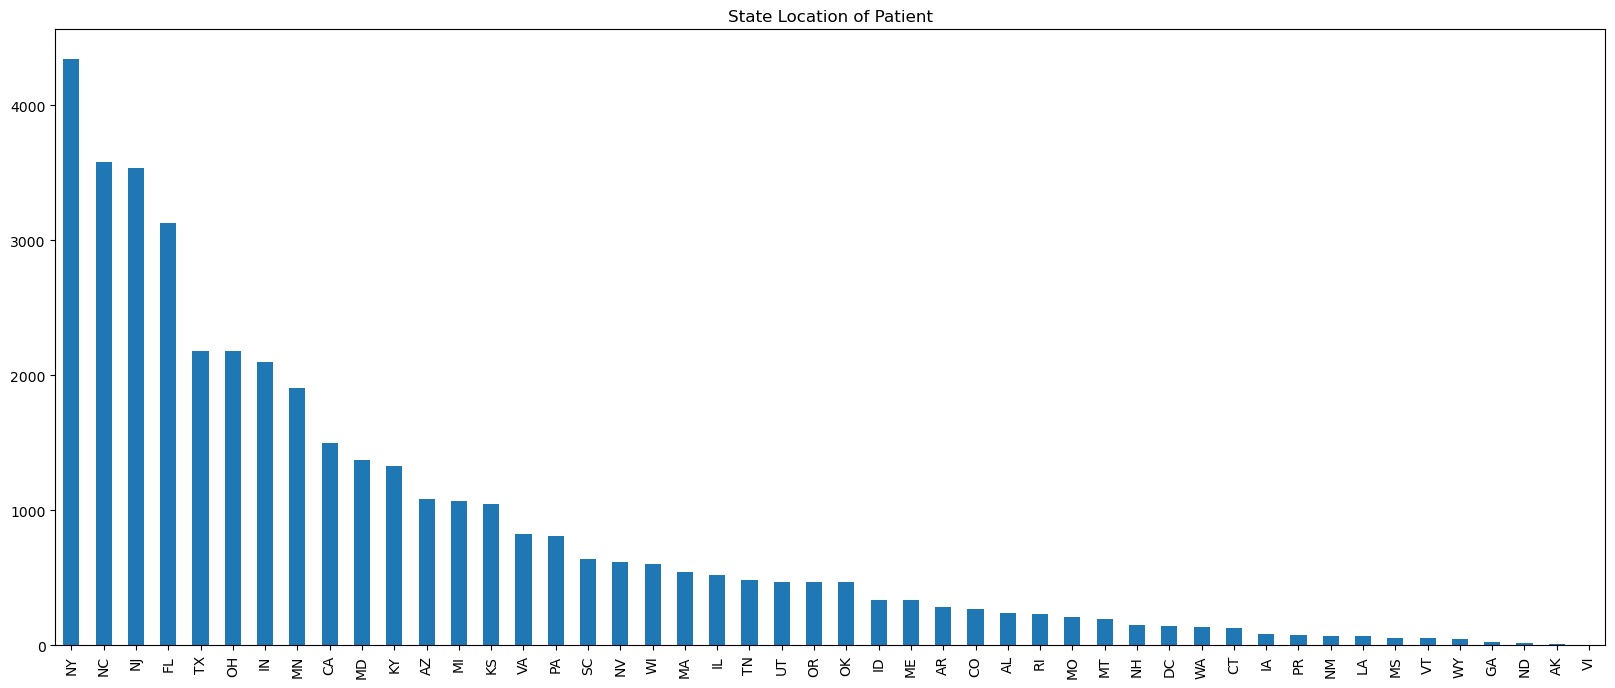

In [611]:
df['res_state'].value_counts(dropna = False).plot(figsize=(20,8), kind='bar', title='State Location of Patient')

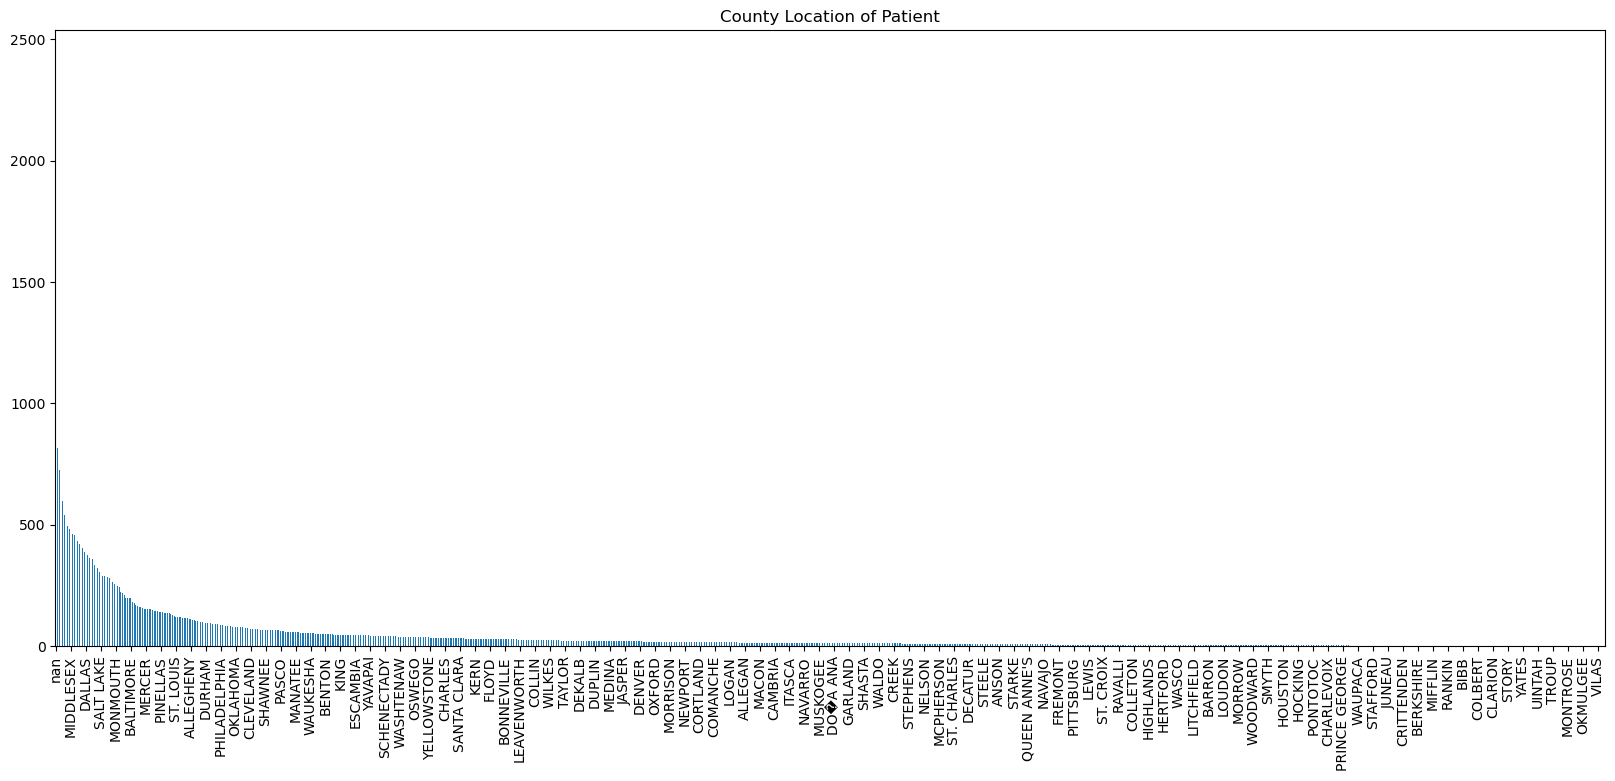

In [612]:
ax = df['res_county'].value_counts(dropna=False).plot(kind='bar', figsize=(20,8), title='County Location of Patient')
ax.tick_params(axis='x', rotation=90)
xlabels = ax.get_xticklabels()
num_labels = len(xlabels)
show_labels = round(num_labels / 100)
ax.set_xticks(range(0, num_labels, show_labels))
ax.set_xticklabels(xlabels[::show_labels])
plt.show()

<AxesSubplot: title={'center': 'Race of Patient'}>

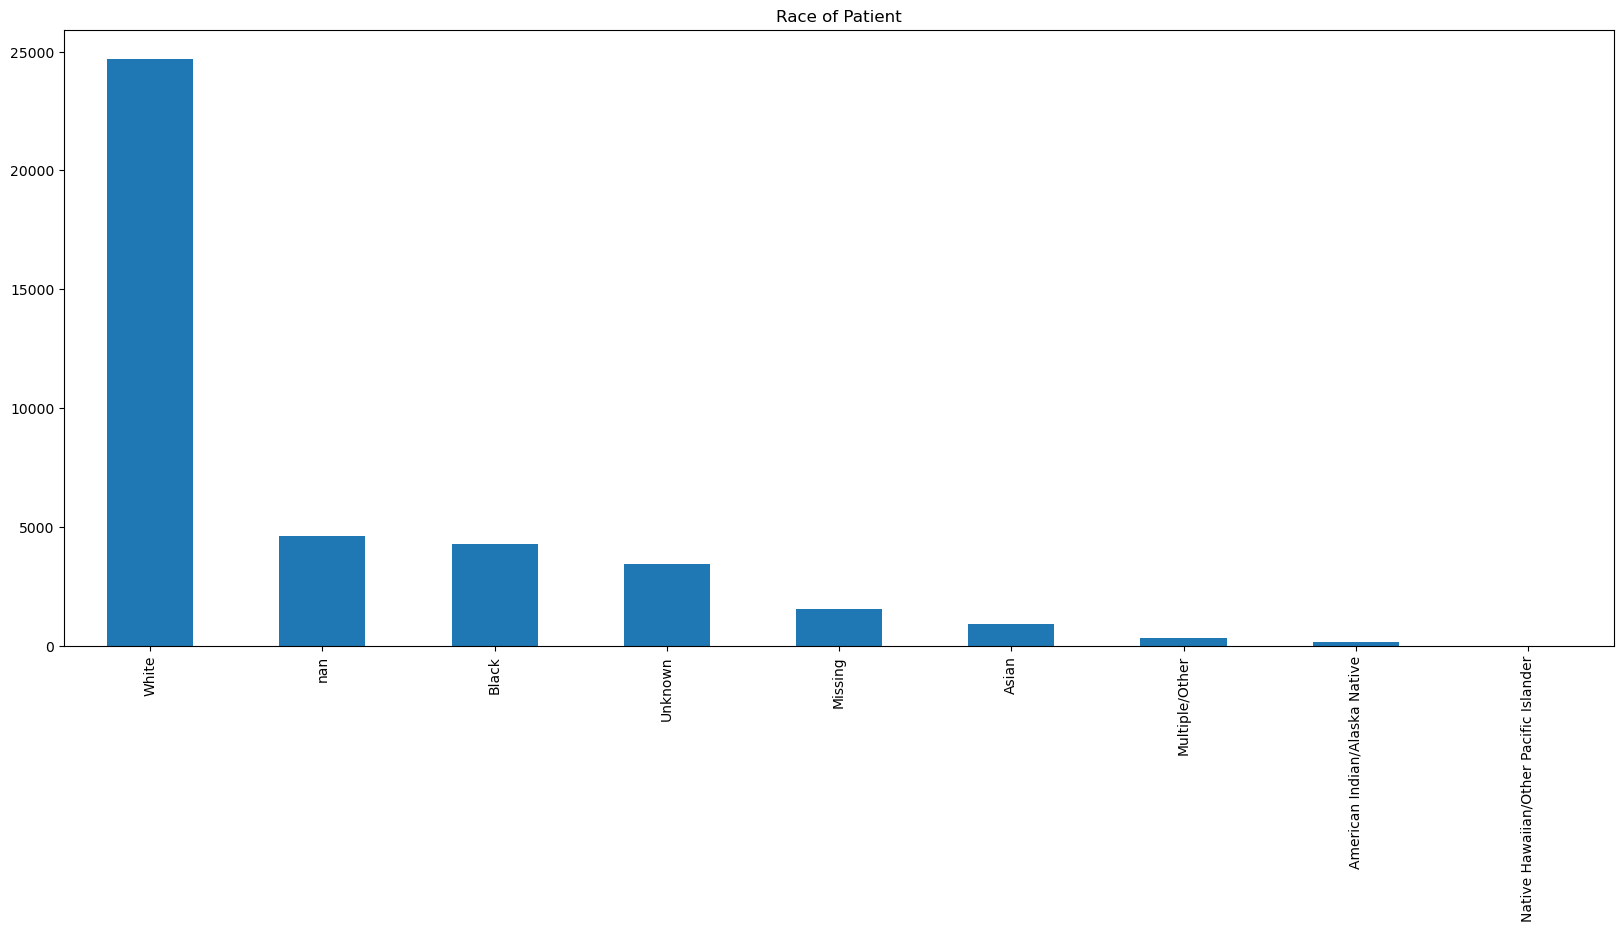

In [613]:
df['race'].value_counts(dropna = False).plot(figsize=(20,8), kind='bar', title='Race of Patient')

<AxesSubplot: title={'center': 'Ethnicity of Patient'}>

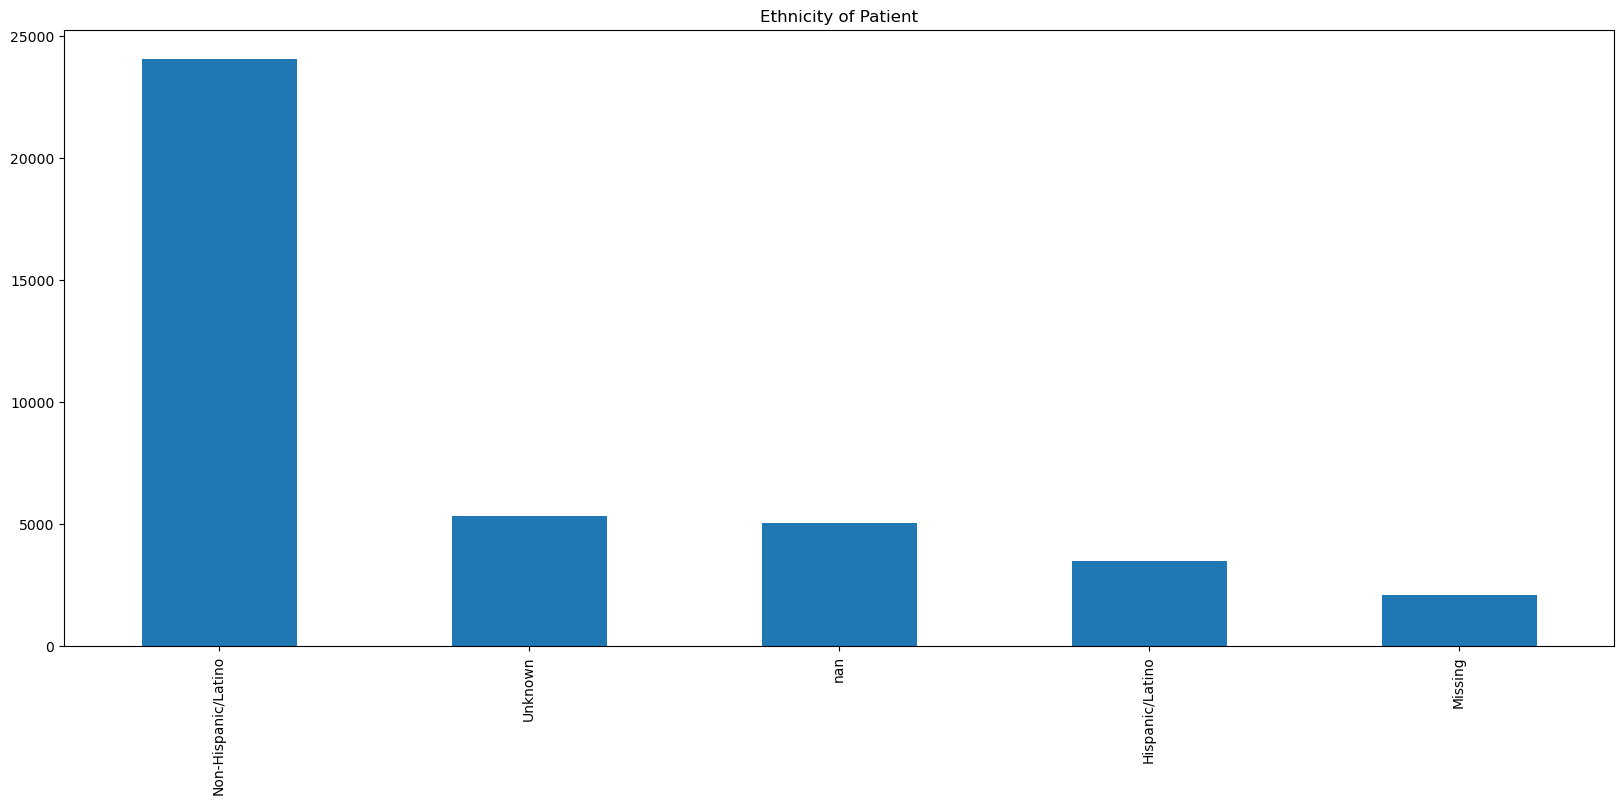

In [614]:
df['ethnicity'].value_counts(dropna = False).plot(figsize=(20,8), kind='bar', title='Ethnicity of Patient')

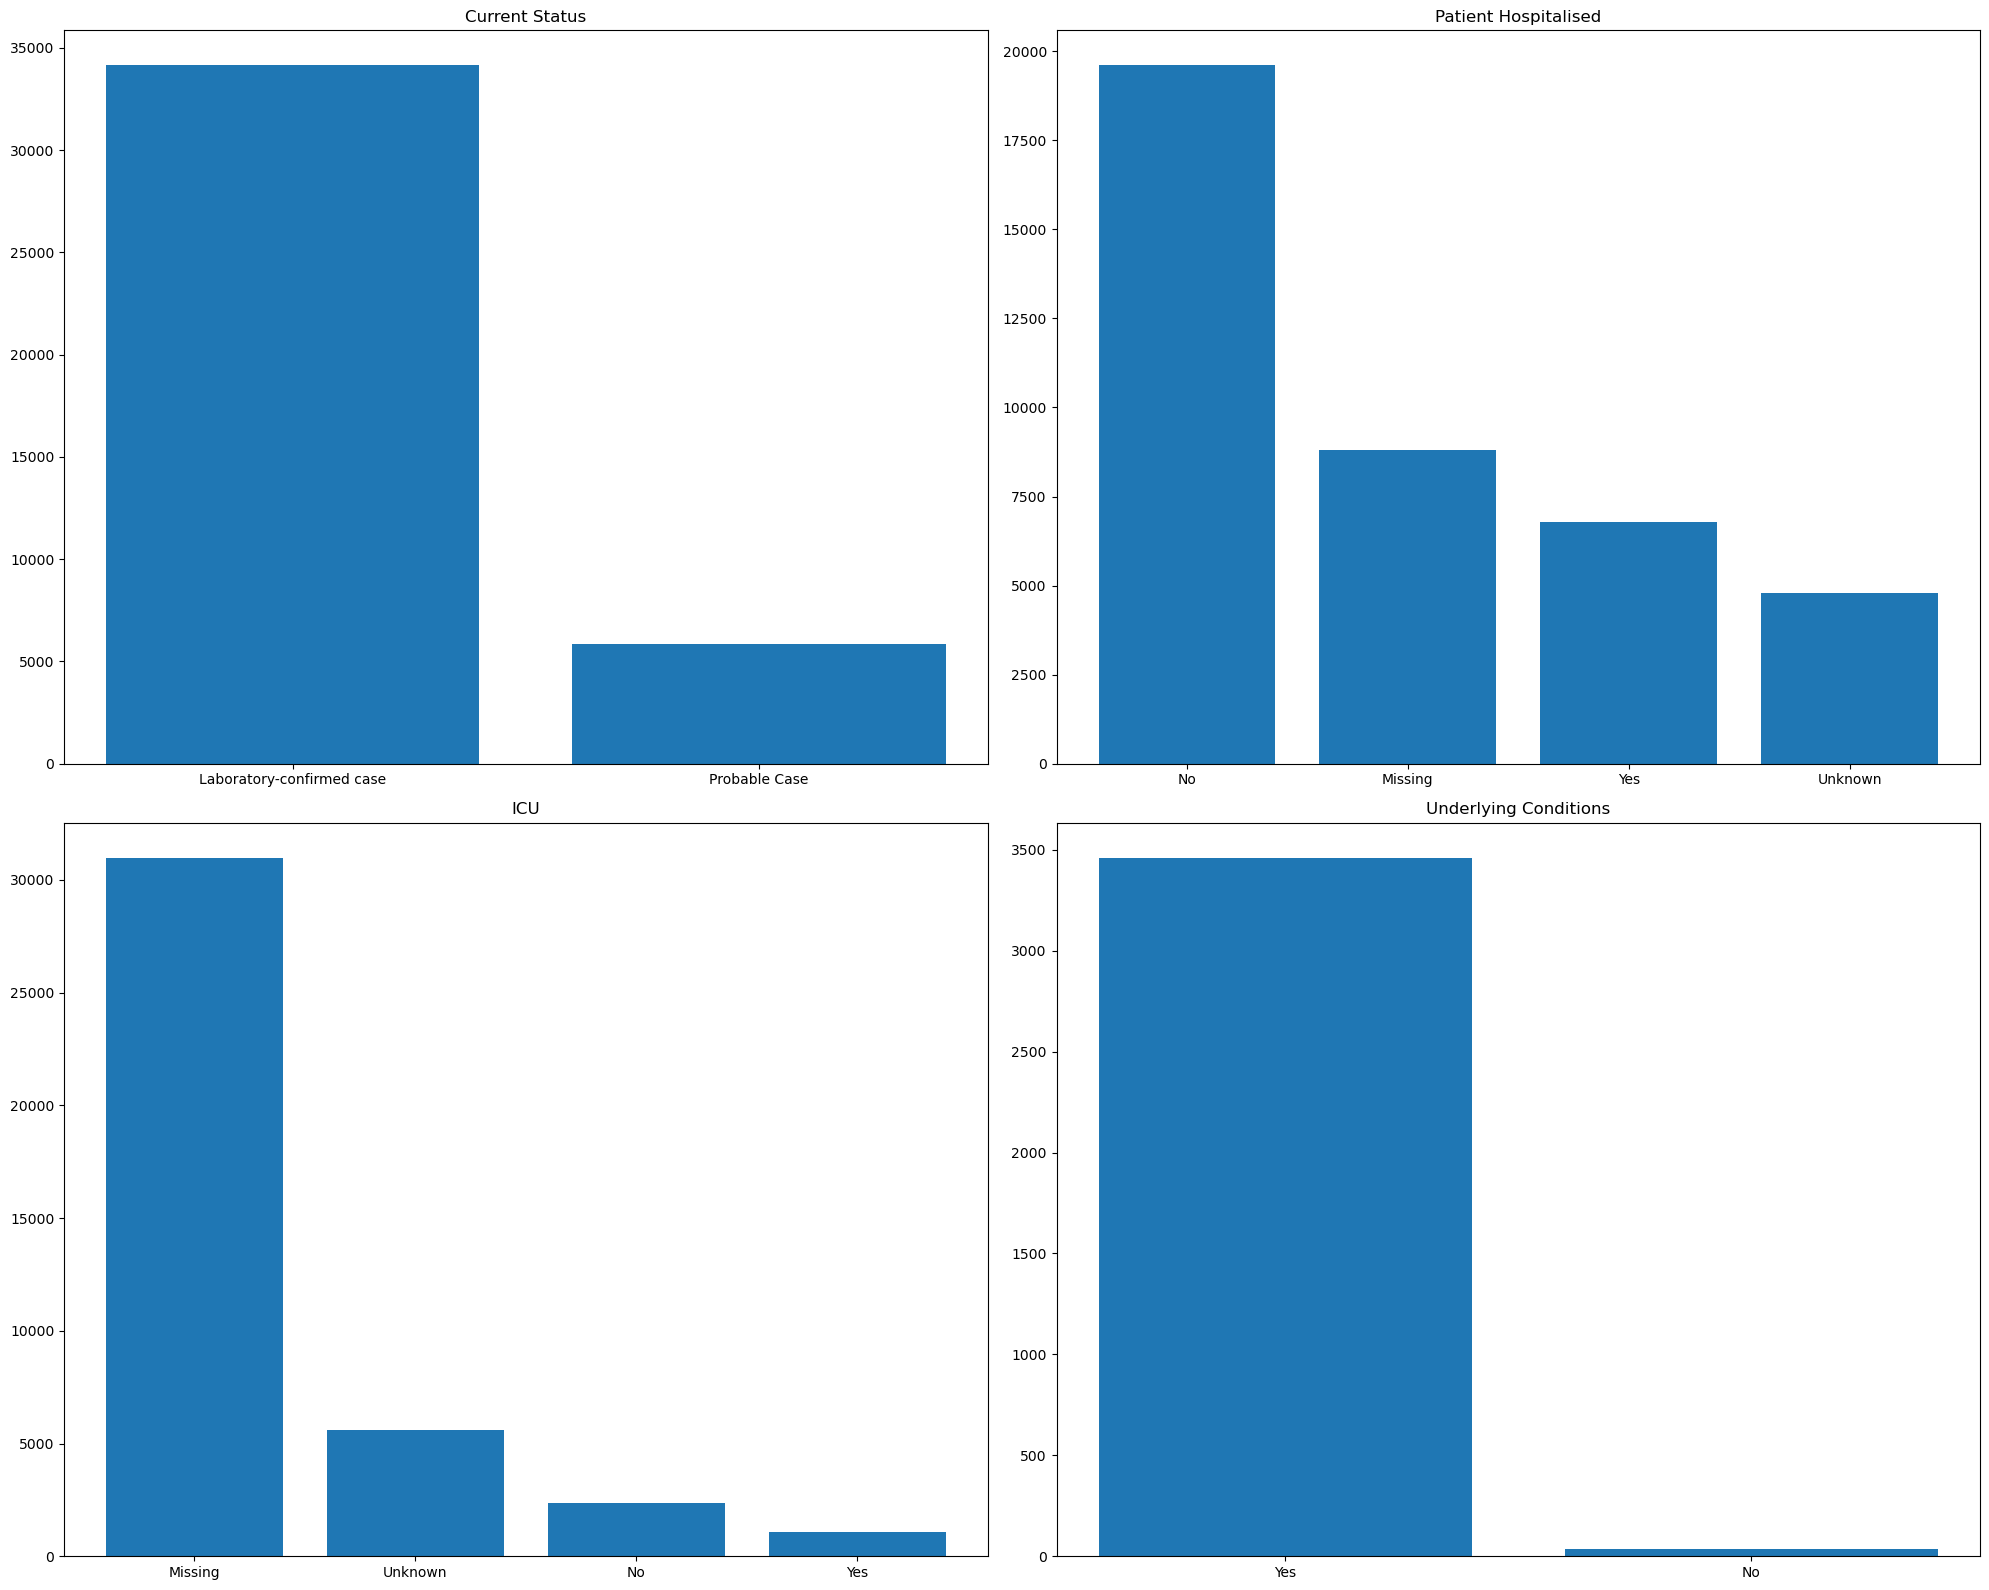

In [615]:
# # Create a figure with two subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(20, 16))

# Plot the first bar chart on the first subplot

x1 = df['current_status'].value_counts().index
y1 = df['current_status'].value_counts()

x2 = df['hosp_yn'].value_counts().index
y2 = df['hosp_yn'].value_counts()

x3 = df['icu_yn'].value_counts().index
y3 = df['icu_yn'].value_counts()

x4 = df['underlying_conditions_yn'].value_counts().index
y4 = df['underlying_conditions_yn'].value_counts()

ax1.set_title('Current Status')
ax2.set_title('Patient Hospitalised')
ax3.set_title('ICU')
ax4.set_title('Underlying Conditions')

ax1.bar(x1, y1)
ax2.bar(x2, y2)
ax3.bar(x3, y3)
ax4.bar(x4, y4)

plt.tight_layout()

plt.show()

<AxesSubplot: title={'center': 'How Patient Discovered Being COVID Positive'}>

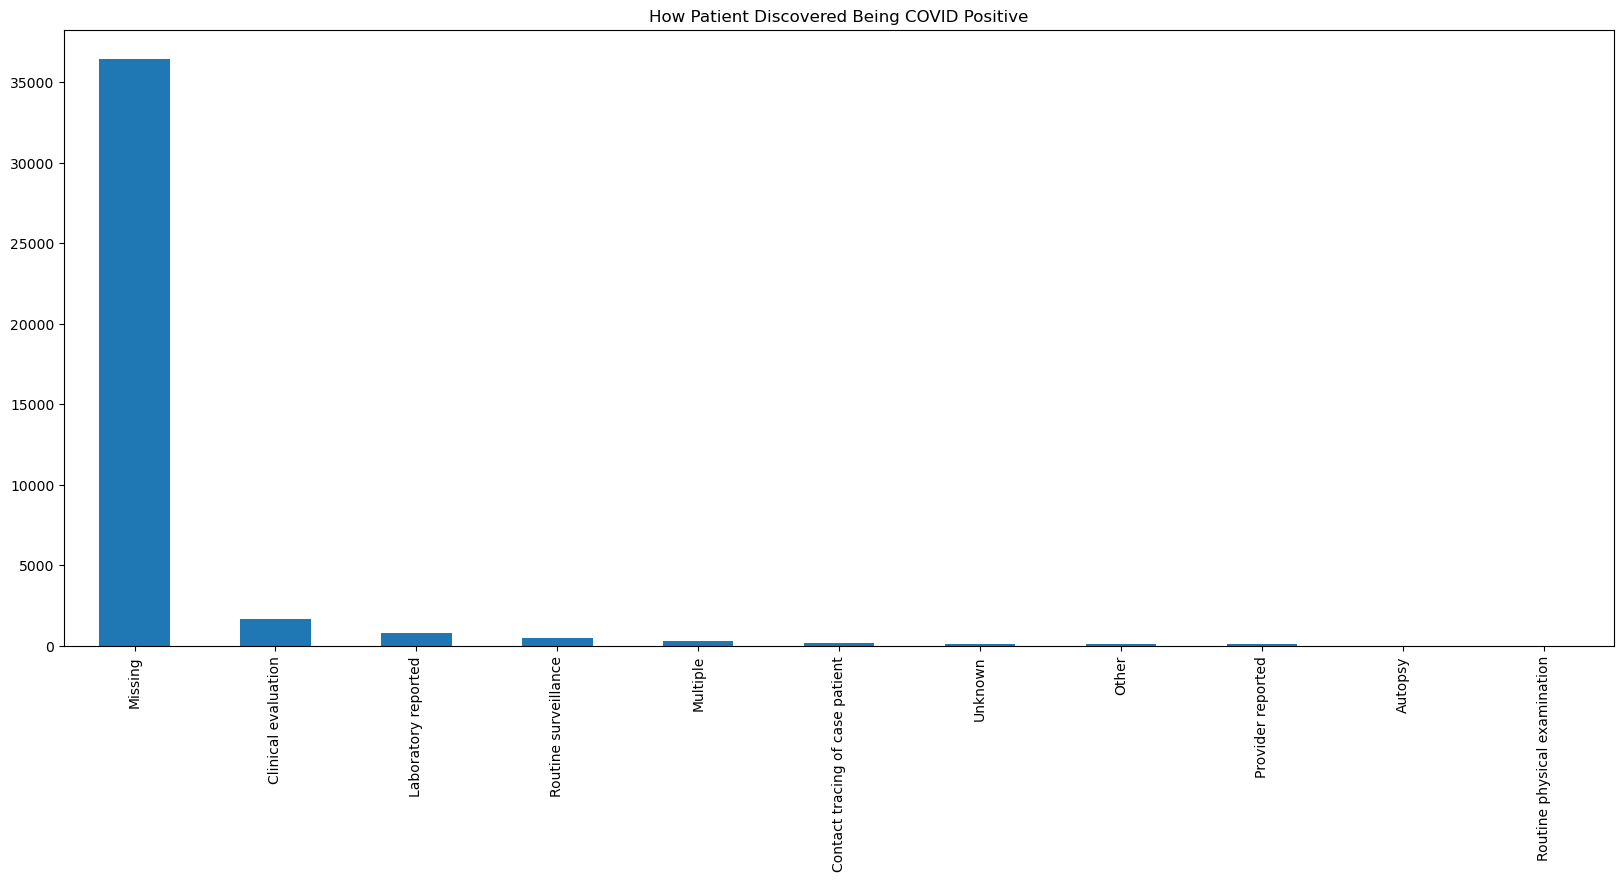

In [616]:
df['process'].value_counts(dropna = False).plot(figsize=(20,8), kind='bar', title='How Patient Discovered Being COVID Positive')

<AxesSubplot: title={'center': 'Patient Exposed to COVID'}>

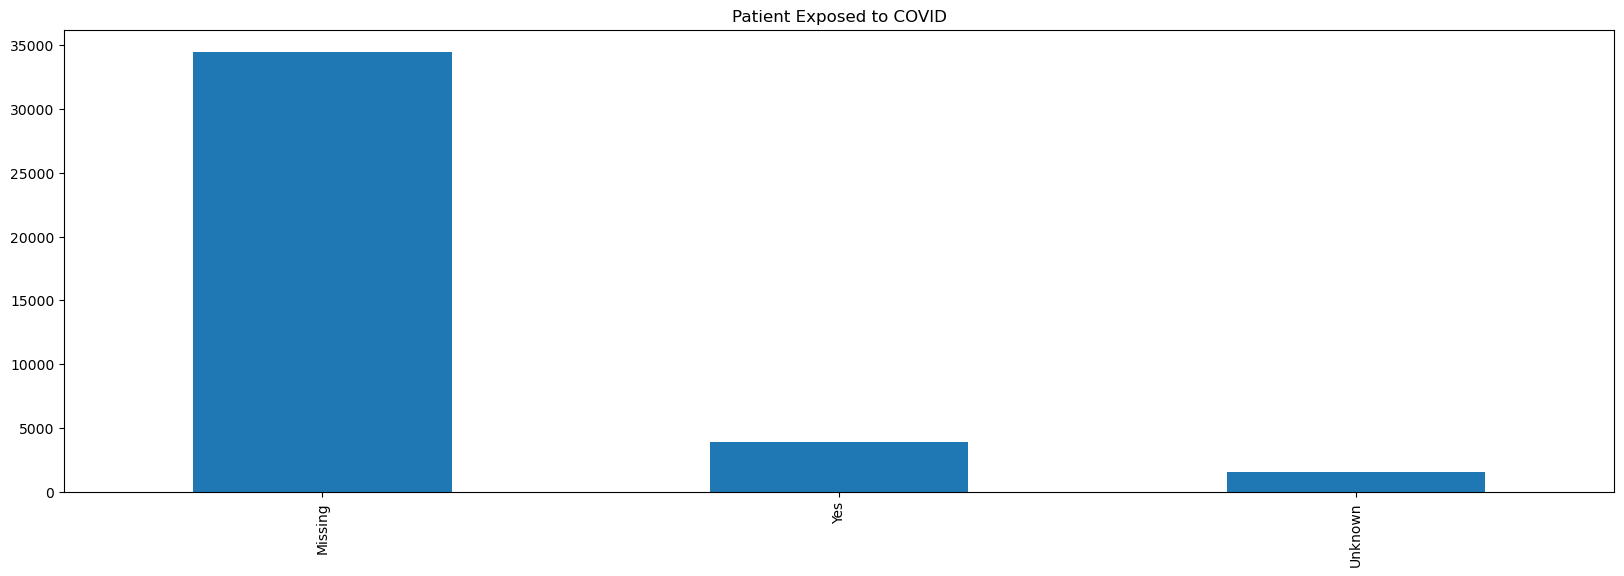

In [617]:
df['exposure_yn'].value_counts(dropna = False).plot(figsize=(20,6), kind='bar', title='Patient Exposed to COVID')

<AxesSubplot: title={'center': 'Patient is a COVID confirmed or probable case'}>

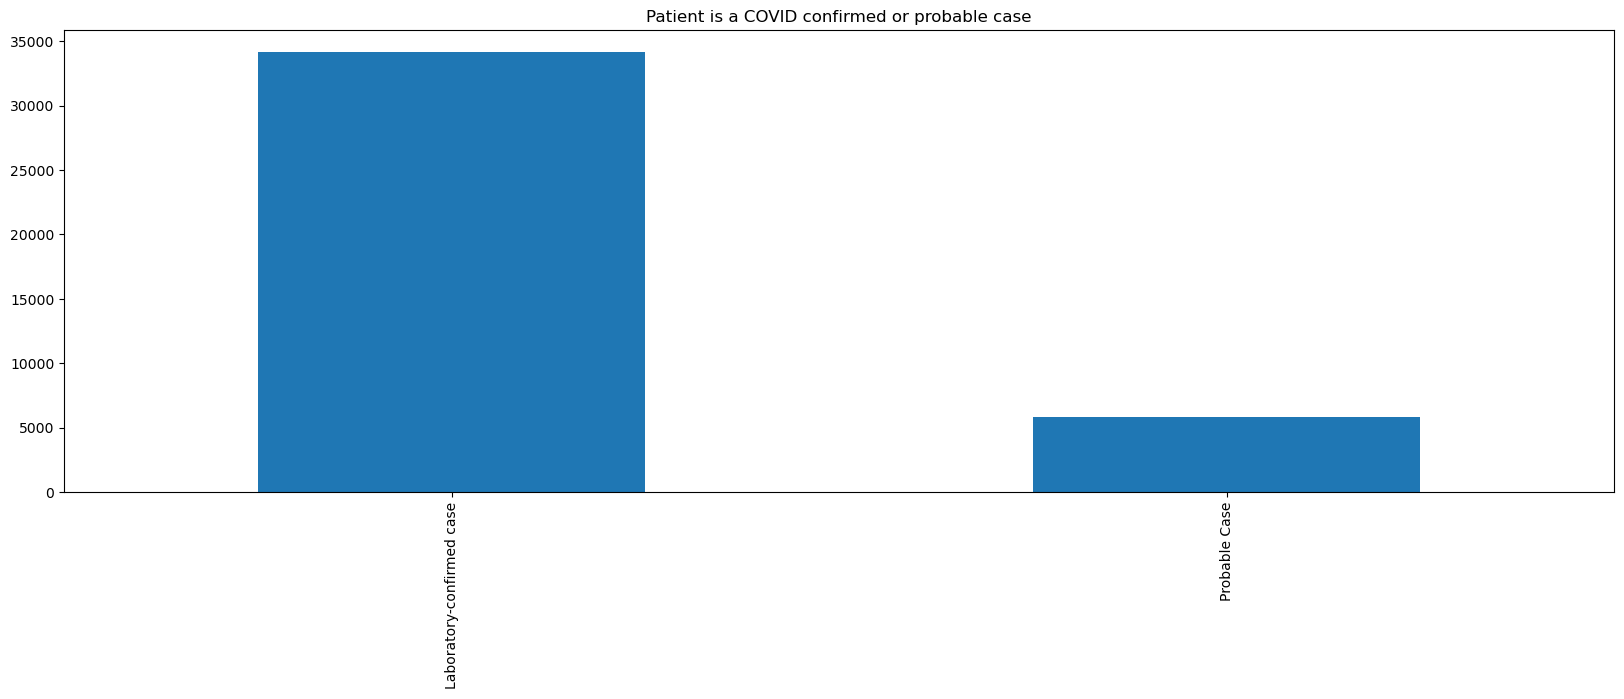

In [618]:
df['current_status'].value_counts(dropna = False).plot(figsize=(20,6), kind='bar', title='Patient is a COVID confirmed or probable case')

<AxesSubplot: title={'center': 'Was patient symptomatic of COVID or not'}>

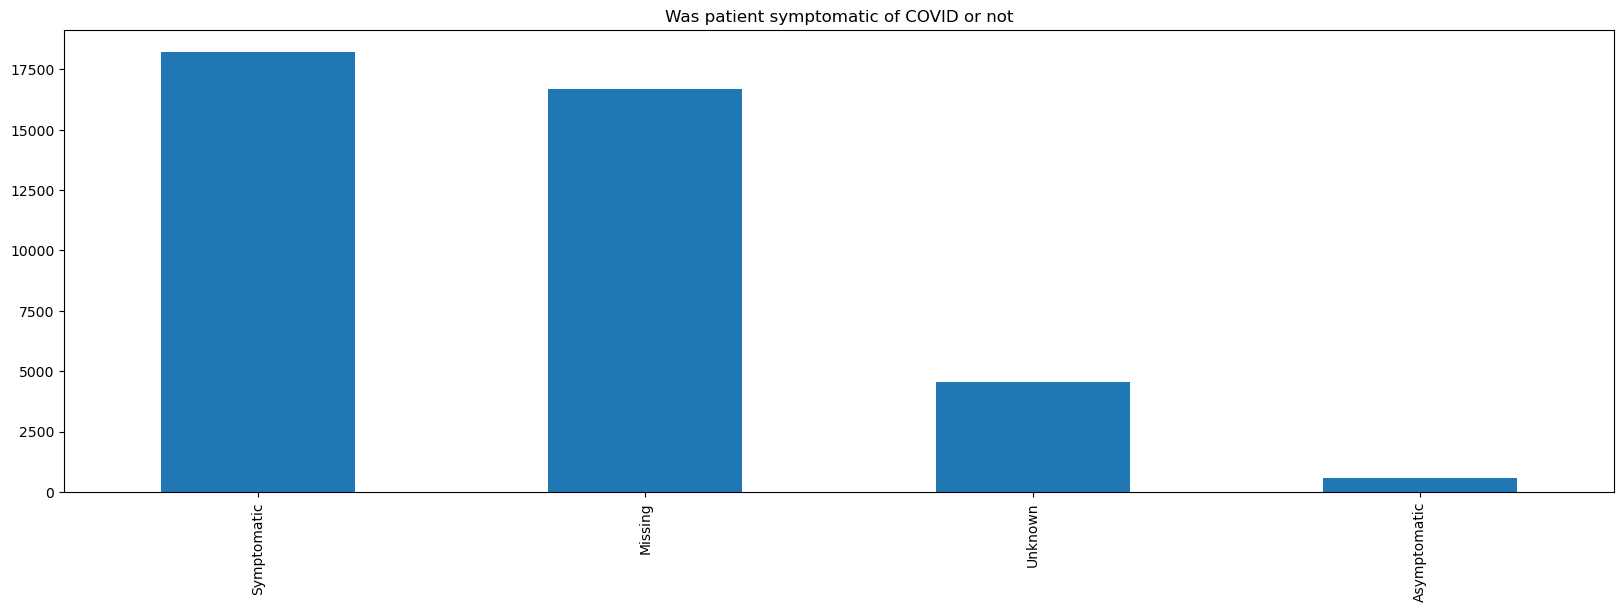

In [619]:
df['symptom_status'].value_counts(dropna = False).plot(figsize=(20,6), kind='bar', title='Was patient symptomatic of COVID or not')

<AxesSubplot: title={'center': 'Patient Hospitalised as a result of COVID'}>

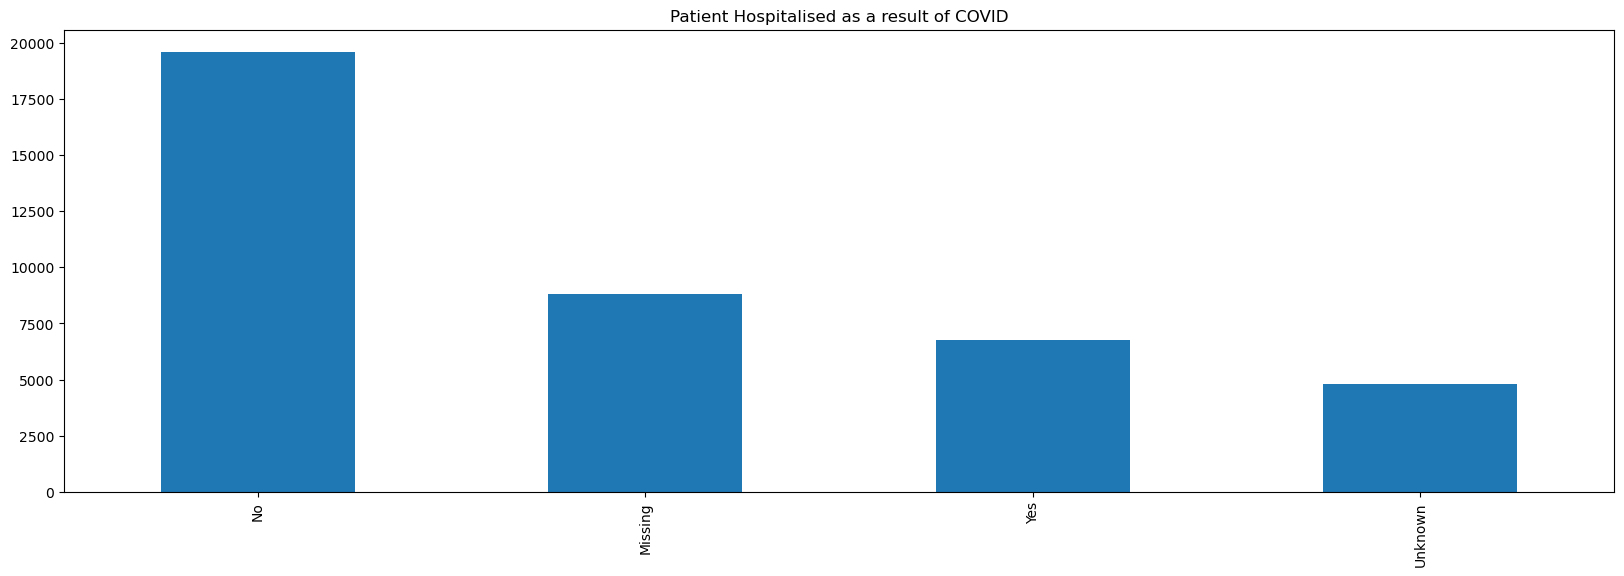

In [620]:
df['hosp_yn'].value_counts(dropna = False).plot(figsize=(20,6), kind='bar', title='Patient Hospitalised as a result of COVID')

<AxesSubplot: title={'center': 'Patient taken to ICU as a result of COVID'}>

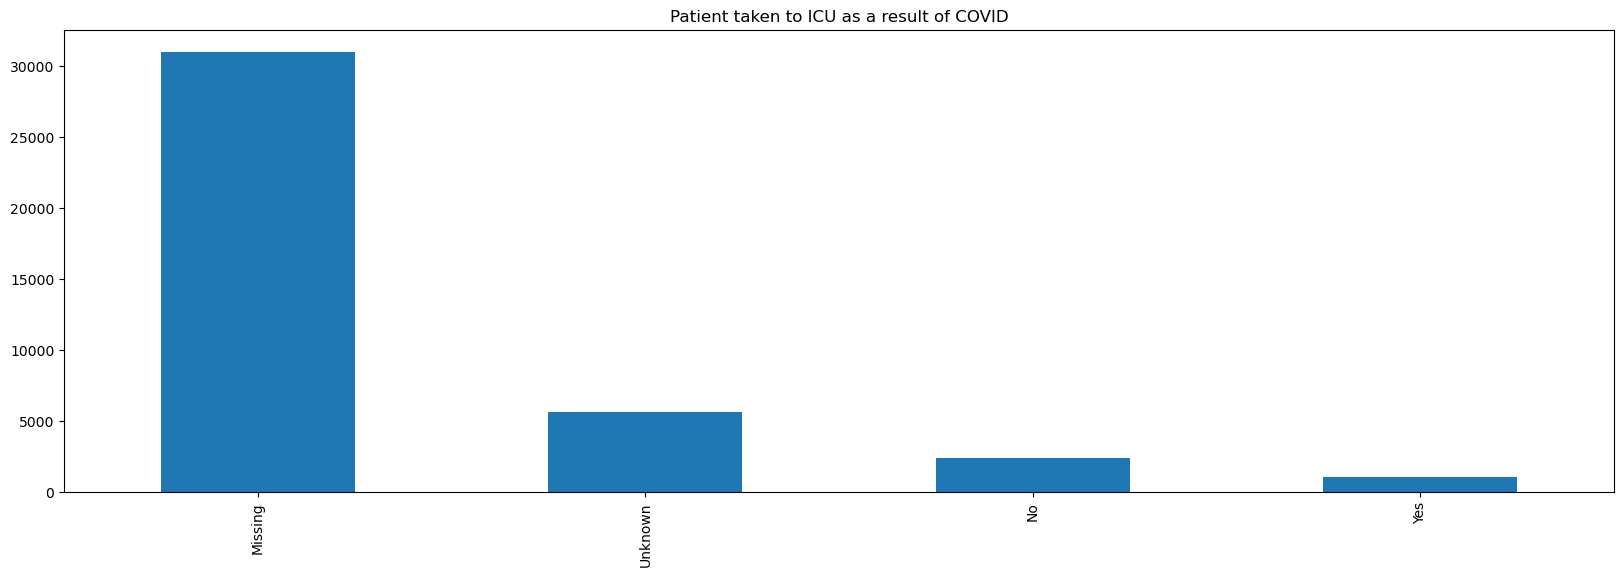

In [621]:
df['icu_yn'].value_counts(dropna = False).plot(figsize=(20,6), kind='bar', title='Patient taken to ICU as a result of COVID')

<AxesSubplot: title={'center': 'Did the Patient have underlying conditions with regards COVID'}>

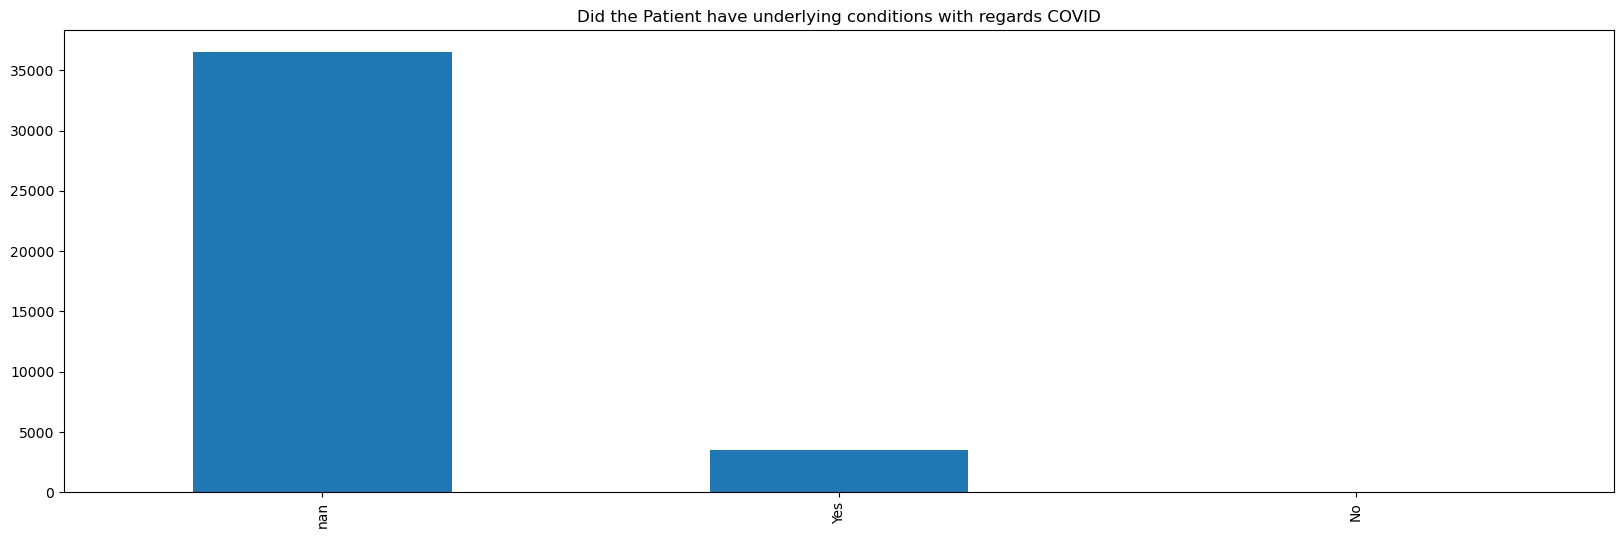

In [622]:
df['underlying_conditions_yn'].value_counts(dropna = False).plot(figsize=(20,6), kind='bar', title='Did the Patient have underlying conditions with regards COVID')

<AxesSubplot: title={'center': 'Did Patient Die of COVID'}>

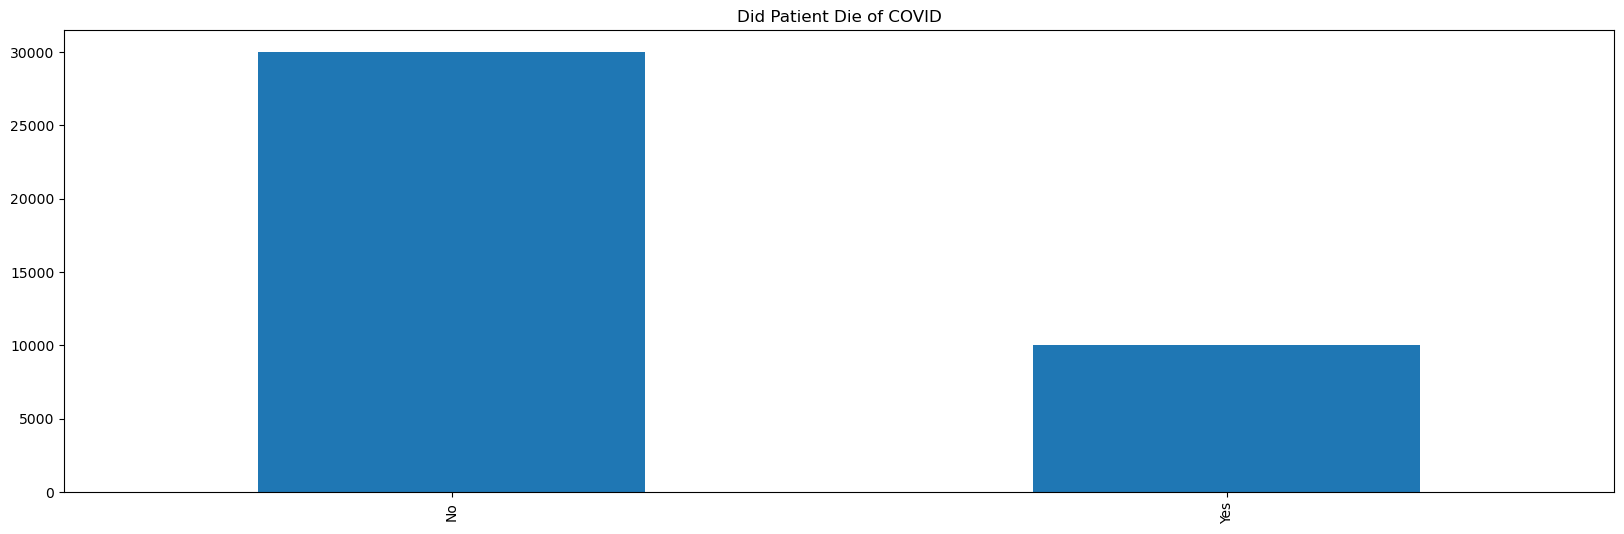

In [623]:
df['death_yn'].value_counts(dropna = False).plot(figsize=(20,6), kind='bar', title='Did Patient Die of COVID')

# Part 2

# Data Quality Plan

In [624]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

df = pd.read_csv('revised-covid19-cdc-combined-22207000-12468998.csv', keep_default_na=True, delimiter=',', skipinitialspace=False)
continous_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(['object']).columns

# Data Quality Plan: Framework for Execution
Having reviewed each feature in the dataset there are a number of actions that need to be taken with the remaining 17 features recorded on our dataset; chief among them is tackling the high level of missing data inherent in our dataset. This plan lists each feature and the problem(s) identified, as well as the solution that will be implemented for the feature, in order to address the problem identified.

# Continuous Features 

| Feature                        | Data Quality Issue         | Handling Strategy      |
|--------------------------------|----------------------------|------------------------|
|Case Positive Specimen Interval | High amount of missing data (50%)   |Investigate cause for blank values and confirm how many rows are affected and correct errors                  |
|Case Onset Interval             | Negative feature values and high amount of missing data (60%)    |Investigate cause for blank values and confirm how many rows are affected and correct errors             |


## Case Positive Specimen Interval

In [625]:
df['case_positive_specimen_interval'].apply(lambda x: (x<0)).sum()

124

In [626]:
df['case_positive_specimen_interval'].describe().T

count    21102.000000
mean         0.168088
std          2.390216
min        -72.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         79.000000
Name: case_positive_specimen_interval, dtype: float64

As per the CDC guidelines, calculating a negative value here is possible. For example, if a person is tested for COVID before they become symptomatic, the case_positive_specimen_interval may be negative because the test result came back positive before the onset of symptoms. Therefore, we should consider leaving these values alone as it is possible for a negative value to be recorded.

However, we should look to impute and correct the NAN values in this feature. One approach is to use the mean value of the case_positive_specimen_intervals for patients from the same county who were positve for COVID at the same time as a substitute. If the mean value for a county is missing, we can use the mean value for state the county belongs to instead. And finally, if there is no value attributed to the row, we can then use the mean of the entire dataset as the substitute value. And to conform with CDC guidelines, we can round the imputed values to the nearest integer.

Advantages of approach:
1. It helps to retain the overall distribution of the feature by using a representative value (mean) for imputation, instead of simply assigning a fixed value or dropping the missing values altogether.
2. Grouping the imputation by state ensures that the substitute value is more likely to be similar to the missing value, as patients from the same state may have similar demographic or environmental factors that influence the feature.

Disadvantages of approach:
1. Imputing missing values with the mean can result in biased estimates if this feature's distribution is not normal or if there are outliers or other non-standard distributions present. 
2. The imputed values may not always accurately reflect the true values for the missing data, especially if there is significant variation in the feature within a county or state.

In [627]:
df['case_positive_specimen_interval'].fillna(df.groupby(['res_county', 'case_month'])['case_positive_specimen_interval'].transform("mean"), inplace=True)
df['case_positive_specimen_interval'] = np.ceil(df['case_positive_specimen_interval'])

In [628]:
df['case_positive_specimen_interval'].fillna(df.groupby(['res_state', 'case_month'])['case_positive_specimen_interval'].transform("mean").fillna(df['case_onset_interval'].mean()), inplace=True)
df['case_positive_specimen_interval'] = np.ceil(df['case_positive_specimen_interval'])

In [629]:
df['case_positive_specimen_interval'].isnull().sum()

0

## Case Onset Interval


In [630]:
df['case_onset_interval'].apply(lambda x: (x<0)).sum()

557

In [631]:
df.drop(df[(df['case_onset_interval'] <0)].index, inplace=True)

In [632]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
case_positive_specimen_interval,39443.0,0.434805,2.395639,-72.0,0.0,0.0,1.0,79.0
case_onset_interval,16735.0,0.073140,1.569140,0.0,0.0,0.0,0.0,58.0


In [633]:
df['case_onset_interval'].isnull().sum()

22708

Again, we should look to impute and correct the NAN values by following the approach we followed previously for 'case_positive_specimen_interval'. The same advantages and disadvantages apply here, whereby we are introducing some bias into our dataset, but we retain the overall distribution of the feature by using the mean for imputation, and attempted to model as closely as possible the intervals at play in the locality of the patient.

In [634]:
df['case_onset_interval'].fillna(df.groupby(['res_county', 'case_month'])['case_onset_interval'].transform("mean"), inplace=True)
df['case_onset_interval'] = np.ceil(df['case_onset_interval'])

In [635]:
df['case_onset_interval'].isnull().sum()

9492

In [636]:
df['case_onset_interval'].fillna(df.groupby(['res_state', 'case_month'])['case_onset_interval'].transform("mean").fillna(df['case_onset_interval'].mean()), inplace=True)
df['case_onset_interval'] = np.ceil(df['case_onset_interval'])

In [637]:
# .fillna(df['case_onset_interval'].mean()),
df['case_onset_interval'].isnull().sum()

0

## Res County

In [638]:
df['res_county'].isna().sum()

2364

Imputing the mode here confers advantages, namely it preserves the distribution of the data, as the imputed values are drawn from the existing values in the dataset. However, it does again introduce a small element of bias as the mode might be overreprestened for a given state. However, given the small level of imputation required, I believe this to be a net positive overall.

In [639]:
df['res_county'].fillna(df.groupby('res_state')['res_county'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else "placeholder"), inplace=True)

df.loc[(df['res_county'] == 'placeholder') & (df['res_state'] == 'PR'), 'res_county'] = 'PUERTO RICO'
df.loc[(df['res_county'] == 'placeholder') & (df['res_state'] == 'VI'), 'res_county'] = 'VIRGIN ISLANDS'

However, this dataset contains Puerto Rico as a state in the res_state feature, and Puerto Rico has no counties associated with it in our dataset. Therefore, we should create a new county for our Dataset called PUERTO RICO reserved only for the state of Puerto Rico. Likewise, the same applies for another overseas territory, Virgin Islands.

In [640]:
df['res_county'].isna().sum()

0

## Age Group

In [641]:
df['age_group'].isna().sum()

279

We have 126 records where our dataset records an empty value for age groups. In this instance, given the relatively low level of missing data, I am happy to drop these rows from our dataset as it reduces bias and preservers integrity of dataset. 

In [642]:

df.dropna(subset=['age_group'], inplace=True)

In [643]:
df['age_group'].isna().sum()

0

In [644]:
df.drop(df[df['age_group'] == 'Missing'].index, inplace=True)

## Sex 

In [645]:
df['sex'].isna().sum()

526

In [646]:
df['sex'].value_counts()

Female     19864
Male       18537
Unknown      157
Missing       27
Name: sex, dtype: int64

In this instance, given the relatively low level of missing data, we are going to drop the affected rows. Alternatively we can impute the mode here as the substitute, however, we are trying to limit introducing bias to our dataset and we have no clever means of accurately imputing the missing sex data based on the features we have.

In [647]:
df.drop(df[df['sex'] == 'Missing'].index, inplace=True)
df.dropna(subset=['sex'], inplace=True)

In [648]:
df['sex'].value_counts()

Female     19864
Male       18537
Unknown      157
Name: sex, dtype: int64

## Race

In [649]:
df['race'].value_counts(dropna=False)

White                                     24373
Black                                      4230
NaN                                        3792
Unknown                                    3252
Missing                                    1513
Asian                                       909
Multiple/Other                              329
American Indian/Alaska Native               153
Native Hawaiian/Other Pacific Islander        7
Name: race, dtype: int64

Here we are going to impute the missing values by taking the mode for race of the county that the patient belongs to. The thought here is that we can take demographic profile for each county as a proxy for the most likely category the 'missing' patient belongs to, with regards to race. If the value is unknown, we are going to replace it for Missing and run a loop to impute the mode. If the values for the patient are still 'Missing' at the end we are going to drop these rows. 

The advantage of this approach are that: 
1.	Using the county of the patient as a proxy for race provides a reasonable approximation of the missing race, especially in areas where there is a high correlation between race and geographic location. 

However:
1.	Using the county of the patient as a proxy for race may not accurately capture the true ethnicity of the patient, especially if there is a high degree of diversity within the county.
2.	Imputing the mode of ethnicity for each county assumes that all patients within the county have the same race, which may not be true.
3.	Imputing missing data using a mode-based method can introduce bias, especially if the mode is not representative of the true distribution of the missing values.


In [650]:
df['res_county'].nunique()

910

In [651]:
assumption = df.groupby(['res_county', 'race']).size().reset_index(name='count')
assumption['percent'] = assumption.groupby('res_county', group_keys=False)['count'].apply(lambda x: 100 * x / x.sum())
countiesover50 = assumption[assumption['percent'] > 50]['res_county'].nunique()
countiesover75 = assumption[assumption['percent'] > 75]['res_county'].nunique()
print(countiesover50)
print(countiesover75)

856
657


In [652]:
df['race'].fillna(df.groupby('res_county')['race'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else "Missing"), inplace=True)
df['race'] = df['race'].replace('Unknown', 'Missing')

missing_Race = df[df['race'] == 'Missing']
counties_with_missing_race = missing_Race['res_county'].unique()
mask = (df['race'] == 'Missing')

for county in counties_with_missing_race:
    mode_race = df[df['res_county'] == county]['race'].mode()
    if mode_race[0] != 'Missing':
        missing_Race.loc[missing_Race['res_county'] == county, 'race'] = mode_race[0]

df.loc[mask, 'race'] = missing_Race['race']

In [653]:
df.drop(df[df['race'] == 'Missing'].index, inplace=True)

In [654]:
df['race'].value_counts(dropna=False)

White                                     31305
Black                                      4625
Asian                                       910
Multiple/Other                              329
American Indian/Alaska Native               172
Native Hawaiian/Other Pacific Islander        7
Name: race, dtype: int64

## Ethnicity


In [655]:
df['ethnicity'].value_counts()

Non-Hispanic/Latino    23797
Unknown                 4345
Hispanic/Latino         3146
Missing                 1967
Name: ethnicity, dtype: int64

Again, we are going to use the county of the patient as a proxy for their ethnicity. We are going to take the mode of ethnicity for each county, and impute this value for those whose ethnicity is missing. If the value is unknown, we are going to replace it for Missing and run a loop to impute the mode. If the values for the patient are still 'Missing' at the end we are going to drop these rows.

In [656]:
assumption = df.groupby(['res_county', 'ethnicity']).size().reset_index(name='count')
assumption['percent'] = assumption.groupby('res_county', group_keys=False)['count'].apply(lambda x: 100 * x / x.sum())
countiesover50 = assumption[assumption['percent'] > 50]['res_county'].nunique()
countiesover75 = assumption[assumption['percent'] > 75]['res_county'].nunique()
print(countiesover50)
print(countiesover75)

867
639


In [657]:
df['ethnicity'].fillna(df.groupby('res_county')['ethnicity'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else "Missing"), inplace=True)
df['ethnicity'] = df['ethnicity'].replace('Unknown', 'Missing')

missing_Ethnicity = df[df['ethnicity'] == 'Missing']
counties_with_missing_Ethnicity = missing_Ethnicity['res_county'].unique()
mask = (df['ethnicity'] == 'Missing')

for county in counties_with_missing_Ethnicity:
    mode_eth = df[df['res_county'] == county]['ethnicity'].mode()
    if mode_eth[0] != 'Missing':
        missing_Ethnicity.loc[missing_Ethnicity['res_county'] == county, 'ethnicity'] = mode_eth[0]

df.loc[mask, 'ethnicity'] = missing_Ethnicity['ethnicity']

In [658]:
df.drop(df[df['ethnicity'] == 'Missing'].index, inplace=True)

In [659]:
df['ethnicity'].value_counts()

Non-Hispanic/Latino    32054
Hispanic/Latino         3411
Name: ethnicity, dtype: int64

## Process

In [660]:
df['process'].value_counts()

Missing                            32047
Clinical evaluation                 1580
Laboratory reported                  726
Routine surveillance                 475
Multiple                             273
Contact tracing of case patient      121
Unknown                              110
Other                                 66
Provider reported                     65
Autopsy                                1
Routine physical examination           1
Name: process, dtype: int64

For this feature we have a very high level of missing data, with over 91% of this feature missing. And while this feature is particularly insightful as it plots for us how the patient was confirmed as being COVID positive, we cannot accurately impute the missing values as it would introduce a very high level of bias in our dataset, especially considering the high level of cardinality in this dataset. Therefore, we should consider drop this feature entirely from our dataset.  

In [661]:
df.drop(['process'], inplace=True, axis=1)

## Exposure

In [662]:
df['exposure_yn'].value_counts()

Missing    30250
Yes         3702
Unknown     1513
Name: exposure_yn, dtype: int64

For this feature we also have very high level of missing data, with roughly 90% of the data missing. Again, this feature is a particularly insightful feature as it indicates whether the patient was knew that they were exposed to contracting COVID. In contrast to the Process feature, this feature has a cardinality of 3: Yes; Unknown; Missing. And from the CDC documentation and the PUI form, we can deduce the following:

1. If the patient had one or more exposure types, the response is "Yes". 
2. If the patient did not provide any information about exposures, the response is "Missing". 
3. If the patient provided information but it is unknown whether they had any exposures, the response is "Unknown".

So therefore we can understand the data captured here within two discrete groups:
1. We know that a given patient was directly exposed to COVID within the past 14 days.
2. We do not know that a given patient was exposed to COVID within the past 14 days.

In light of this, I think we can make a case for retaining this data and dividing the groups into 'Yes' and 'Unknown'

In [663]:
df['exposure_yn'] = df['exposure_yn'].replace('Missing', 'Unknown')

## Current Status

In [664]:
df['current_status'].value_counts()

Laboratory-confirmed case    30311
Probable Case                 5154
Name: current_status, dtype: int64

As there are no data quality issues affecting this feature we can progres onto the next feature without issue.

## Hospitalised

In [665]:
df.shape

(35465, 16)

In [666]:
df['hosp_yn'].value_counts()

No         17474
Missing     7225
Yes         6285
Unknown     4481
Name: hosp_yn, dtype: int64

Similar to the exposure_yn feature we can make a case for retaining this feature on the grounds that we can chart those who are known to have been hospitalised as result of covid against those we are unsure of being hospitalised. Here we have roughly 35% of the dataset being recorded as missing meaning that we should review the original form to understand how this data is captured. As per the CDC guidelines, this feature is coded to Missing when the form is not filled out. As per the form there are 3 checkboxes, Yes, No, and Unknown. However, this information is incredibly valuable and provides a keen insights into the severity of a COVID case.

Therefore there are in reality with two distinct groups: Known; Unknown. In the former, there is an additional subgroup: Yes; No. Therefore we can replace the Missing data as Unknown in our feature and retain this feature.

In [667]:
df['hosp_yn']  = df['hosp_yn'].replace('Missing', 'Unknown')
df['hosp_yn']  = df['hosp_yn'].replace('No', 'Unknown')
df['hosp_yn'].value_counts()

Unknown    29180
Yes         6285
Name: hosp_yn, dtype: int64

## Symptom Status

In [668]:
df['symptom_status'].value_counts()

Symptomatic     16586
Missing         14013
Unknown          4345
Asymptomatic      521
Name: symptom_status, dtype: int64

<AxesSubplot: xlabel='symptom_status'>

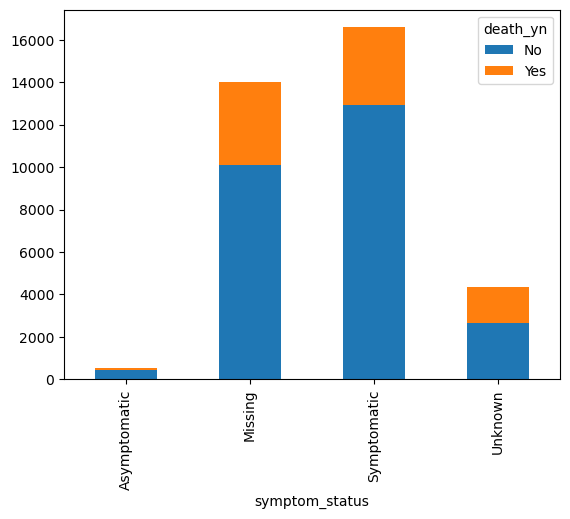

In [669]:
symp_curr = pd.crosstab(df['symptom_status'], df['death_yn'])
symp_curr.plot(kind='bar', stacked=True)

This feature has a high degree of missing with no real means to correct or impute the missing data from other features. Although it is particularly informative when charted against death_yn. However, we should consider dropping this feature, given the lack of means to correc the feature. Additionally, this feature does not articulate the severity of covid for a patient who is symptomatic.

In [670]:
df.drop(['symptom_status'], inplace=True, axis=1)

## ICU

In [671]:
df['icu_yn'].value_counts()

Missing    26945
Unknown     5231
No          2277
Yes         1012
Name: icu_yn, dtype: int64

Similar to hosp_yn and exposure_yn there is a high level of missing data from this feature. But there is value in retaining this feature as we can chart those who are known to have been hospitalised as result of covid against those we are unsure of being hospitalised. This data is also particularly insightful and can aid us in our ultimate goal of evincing trends for death_yn.

In [672]:
df['icu_yn'] = df['icu_yn'].replace('Missing', 'Unknown')
df['icu_yn'] = df['icu_yn'].replace('No', 'Unknown')

<AxesSubplot: xlabel='icu_yn'>

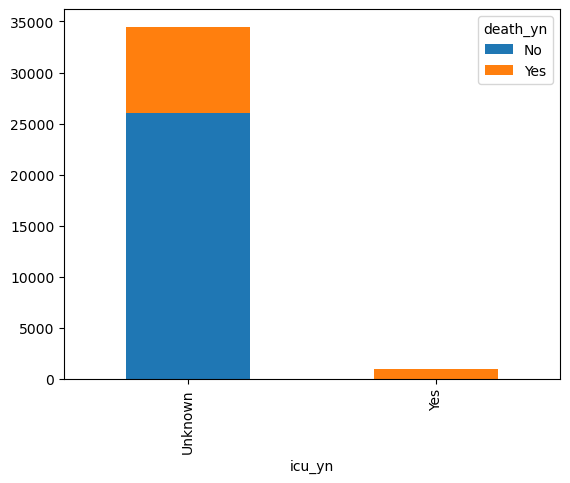

In [673]:
ICU_death = pd.crosstab(df['icu_yn'], df['death_yn'])
ICU_death.plot(kind='bar', stacked=True)

## Death

In [674]:
df['death_yn'].value_counts()

No     26110
Yes     9355
Name: death_yn, dtype: int64

No issues with feature here. Progressing to next feature.

## Underlying Conditions

In [675]:
df['underlying_conditions_yn'].isnull().sum()

32150

In [676]:
df['underlying_conditions_yn'].value_counts()

Yes    3278
No       37
Name: underlying_conditions_yn, dtype: int64

90% of feature here is missing, however, this is a very important feature with regards to predicting death. However, it is very difficult to impute the remaining values, as the level of imputation could distort and reduce the accuracy of our model.

Instead of imputing the missing values, we can slightly augment the feature such that it indicates whether the underlying conditions feature is missing or not. This would allow the model to distinguish between cases where the underlying conditions are unknown versus those where the individual does not have any underlying conditions.

In [677]:
df['underlying_conditions_yn'] = df['underlying_conditions_yn'].fillna('Unknown')
df['underlying_conditions_yn'] = df['underlying_conditions_yn'].replace('No', 'Unknown')
df['underlying_conditions_yn'].value_counts()

Unknown    32187
Yes         3278
Name: underlying_conditions_yn, dtype: int64

# Export file to new CSV

Sanity check before we create a new file to drop any row that has a missing value so that we can progress with machine learning and beyond.

In [678]:
df.dropna(inplace=True)

In [679]:
# As per instruction we are going to save this initially reviewed dataset set as a new file so that we can begin to operate on the dataset
df.to_csv('finalised-covid19-cdc-combined-22207000-12468998.csv', index=False)